<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

# Objective

In this code, we employ functions to clean the dengue, chikungunya, and Zika dataset variables. The result will be a copy of the original dataset with cleaned variables, and it can be used for future data formatting for descriptive analysis and modelling purposes. 

# Packages

In [2]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import datetime
from datetime import datetime, timedelta
#import plotly.graph_objs as go
import matplotlib.pyplot as plt
import csv
import seaborn as sns
%matplotlib inline
sns.set()
from PIL import Image

# Confirmed dengue dataset:

The dataset is just the filtered confirmed cases, using spark, of the original dataset (see SINAN_extracao_dengue)

In [3]:
import sys
import glob

path = r'/Users/julianeoliveira/Desktop/hard_disc/Datalake/SINAN/Dengue/Dengue_confirmado/'
filenames = glob.glob(path + "/*.csv")
filenames

['/Users/julianeoliveira/Desktop/hard_disc/Datalake/SINAN/Dengue/Dengue_confirmado/dengueconf2014.csv',
 '/Users/julianeoliveira/Desktop/hard_disc/Datalake/SINAN/Dengue/Dengue_confirmado/dengueconf2015_A.csv',
 '/Users/julianeoliveira/Desktop/hard_disc/Datalake/SINAN/Dengue/Dengue_confirmado/dengueconf2017.csv',
 '/Users/julianeoliveira/Desktop/hard_disc/Datalake/SINAN/Dengue/Dengue_confirmado/dengueconf2015_C.csv',
 '/Users/julianeoliveira/Desktop/hard_disc/Datalake/SINAN/Dengue/Dengue_confirmado/dengueconf2015_B.csv',
 '/Users/julianeoliveira/Desktop/hard_disc/Datalake/SINAN/Dengue/Dengue_confirmado/dengueconf2016.csv',
 '/Users/julianeoliveira/Desktop/hard_disc/Datalake/SINAN/Dengue/Dengue_confirmado/dengueconf2012.csv',
 '/Users/julianeoliveira/Desktop/hard_disc/Datalake/SINAN/Dengue/Dengue_confirmado/dengueconf2013_a.csv',
 '/Users/julianeoliveira/Desktop/hard_disc/Datalake/SINAN/Dengue/Dengue_confirmado/dengueconf2011.csv',
 '/Users/julianeoliveira/Desktop/hard_disc/Datalake/SINA

## Clean data of 2019

In [4]:
filenames[-1]

'/Users/julianeoliveira/Desktop/hard_disc/Datalake/SINAN/Dengue/Dengue_confirmado/dengueconf2019.csv'

In [5]:
df1 = pd.read_csv(filenames[-1], low_memory = False, encoding="iso-8859-1")

In [6]:
for value in df1.columns:
    print(value)

tp_not
id_agravo
sg_uf_not
id_municip
dt_notific
sem_not
classi_fin
nu_ano
criterio
dt_sin_pri
sem_pri
cs_sexo
nu_idade_n
dt_nasc
codmunres
sg_uf


In [7]:
df1['dt_nasc'] = df1['dt_nasc'].fillna(0)

In [8]:
df1['dt_nasc'] = df1['dt_nasc'].astype(int)

In [9]:
df1['date']= pd.to_datetime(df1['dt_nasc'].astype(str), errors='coerce')

In [10]:
df1['date']

0         1977-03-02
1         1986-07-30
2         1987-01-29
3         1999-10-10
4         2007-10-06
             ...    
1310404   1996-06-09
1310405   1985-03-06
1310406   2018-07-25
1310407   1985-06-26
1310408   2018-03-21
Name: date, Length: 1310409, dtype: datetime64[ns]

In [11]:
from datetime import date 
def calculateAge(born): 
    today = date(2019, 6, 1)
    try:  
        birthday = born.replace(year = today.year) 
  
    # raised when birth date is February 29 
    # and the current year is not a leap year 
    except ValueError:  
        birthday = born.replace(year = today.year, 
                  month = born.month + 1, day = 1) 
  
    if birthday > today: 
        return today.year - born.year - 1
    else: 
        return today.year - born.year 

In [12]:
nu_age = []
for value in df1['date']:
    nu_age.append(calculateAge(value))

In [13]:
df1['nu_idade_n'] = nu_age

In [14]:
df1.columns

Index(['tp_not', 'id_agravo', 'sg_uf_not', 'id_municip', 'dt_notific',
       'sem_not', 'classi_fin', 'nu_ano', 'criterio', 'dt_sin_pri', 'sem_pri',
       'cs_sexo', 'nu_idade_n', 'dt_nasc', 'codmunres', 'sg_uf', 'date'],
      dtype='object')

In [15]:
df1.nu_idade_n.value_counts()

21.0     27103
22.0     26580
23.0     26390
24.0     26197
19.0     25927
         ...  
112.0        2
113.0        1
114.0        1
117.0        1
118.0        1
Name: nu_idade_n, Length: 119, dtype: int64

In [16]:
df1= df1.rename(columns={"codmunres": "id_mn_resi"})

## Concat data to a single dataframe

In [17]:
lst_df = []
for f in filenames:
    print(f)
    df = pd.read_csv(f, low_memory = False, encoding="iso-8859-1")    
    df.columns= df.columns.str.lower()
    lst_df.append(df)

/Users/julianeoliveira/Desktop/hard_disc/Datalake/SINAN/Dengue/Dengue_confirmado/dengueconf2014.csv
/Users/julianeoliveira/Desktop/hard_disc/Datalake/SINAN/Dengue/Dengue_confirmado/dengueconf2015_A.csv
/Users/julianeoliveira/Desktop/hard_disc/Datalake/SINAN/Dengue/Dengue_confirmado/dengueconf2017.csv
/Users/julianeoliveira/Desktop/hard_disc/Datalake/SINAN/Dengue/Dengue_confirmado/dengueconf2015_C.csv
/Users/julianeoliveira/Desktop/hard_disc/Datalake/SINAN/Dengue/Dengue_confirmado/dengueconf2015_B.csv
/Users/julianeoliveira/Desktop/hard_disc/Datalake/SINAN/Dengue/Dengue_confirmado/dengueconf2016.csv
/Users/julianeoliveira/Desktop/hard_disc/Datalake/SINAN/Dengue/Dengue_confirmado/dengueconf2012.csv
/Users/julianeoliveira/Desktop/hard_disc/Datalake/SINAN/Dengue/Dengue_confirmado/dengueconf2013_a.csv
/Users/julianeoliveira/Desktop/hard_disc/Datalake/SINAN/Dengue/Dengue_confirmado/dengueconf2011.csv
/Users/julianeoliveira/Desktop/hard_disc/Datalake/SINAN/Dengue/Dengue_confirmado/dengueconf2

In [18]:
lst_df[-1] = df1

In [19]:
df = pd.concat(lst_df,sort=True)

## Process to clean age group and padronize following the age category given in population from IBGE

In [20]:
df.nu_idade_n = df.nu_idade_n.fillna(0)

In [21]:
df.nu_idade_n.unique()

array([ 4.010e+03,  4.012e+03,  4.066e+03,  4.014e+03,  4.016e+03,
        4.030e+03,  4.023e+03,  4.032e+03,  4.005e+03,  4.021e+03,
        4.049e+03,  4.056e+03,  4.063e+03,  4.022e+03,  4.043e+03,
        4.081e+03,  4.024e+03,  4.070e+03,  4.013e+03,  4.009e+03,
        4.007e+03,  4.044e+03,  4.037e+03,  4.045e+03,  4.042e+03,
        4.040e+03,  4.034e+03,  4.046e+03,  4.052e+03,  4.019e+03,
        4.020e+03,  4.029e+03,  4.036e+03,  4.027e+03,  4.039e+03,
        4.047e+03,  4.051e+03,  4.077e+03,  4.011e+03,  4.025e+03,
        4.026e+03,  4.002e+03,  4.061e+03,  4.038e+03,  4.028e+03,
        4.053e+03,  4.072e+03,  4.054e+03,  4.035e+03,  4.033e+03,
        4.018e+03,  3.006e+03,  4.058e+03,  4.001e+03,  4.015e+03,
        4.006e+03,  4.055e+03,  4.069e+03,  4.073e+03,  4.080e+03,
        4.017e+03,  4.008e+03,  4.004e+03,  4.031e+03,  4.048e+03,
        4.064e+03,  3.010e+03,  4.057e+03,  4.062e+03,  3.005e+03,
        2.001e+03,  4.041e+03,  4.068e+03,  4.059e+03,  4.003e

In [22]:
vector =[]
for value in df.nu_idade_n.astype(int).astype(str):
    if value == '1': value = 2001
    elif value == '2': value = 2001
    elif value == '3': value = 3001
    elif 4<= int(value) < 10: value = '400'+value
    elif len(value) == 2: value = '40' + value
    elif len(value) == 3: value = '4' + value
    vector.extend([value])

In [23]:
np.unique(vector)

array(['0', '1000', '1001', '1002', '1003', '1004', '1005', '1006',
       '1008', '1009', '1010', '1011', '1013', '1015', '1016', '1018',
       '1019', '1020', '1021', '1022', '1023', '1025', '1027', '1028',
       '1031', '1032', '1033', '1034', '1035', '1036', '1037', '1038',
       '1039', '1040', '1042', '1043', '1046', '1050', '1051', '1054',
       '1055', '1056', '1058', '1062', '1064', '1065', '1075', '1076',
       '1077', '1084', '1099', '1105', '1120', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021', '2022', '2023', '2024', '2025', '2026',
       '2027', '2028', '2029', '2030', '2031', '2032', '2033', '2034',
       '2035', '2036', '2037', '2038', '2039', '2040', '2041', '2042',
       '2043', '2044', '2045', '2046', '2047', '2048', '2049', '2050',
       '2051', '2052', '2053', '2054', '2055', '2056', '2057', '2058',
       '2

In [24]:
df['nu_idade_n_cor'] = vector

In [25]:
# Categorize age group
# 0,  101,  202,  303,  404,  505,  606,  707,  808,  909, 1010,
#       1111, 1212, 1313, 1414, 1515, 1616, 1717, 1818, 1919, 2024, 2529,
#       3034, 3539, 4044, 4549, 5054, 5559, 6064, 6569, 7074, 7579, 8099],

In [26]:
df = df[(df.nu_idade_n_cor != '0')& (df.nu_idade_n_cor !='40-1')]

In [27]:
fx = []
for value in df.nu_idade_n_cor:
    if 1000 <= int(value) <4005: faixa = '4' 
    elif 4005 <=int(value)< 4010: faixa = '509'
    elif 4010 <=int(value)< 4015: faixa = '1014'
    elif 4015 <=int(value)< 4020: faixa = '1519'
    elif 4020 <=int(value)< 4025: faixa = '2024'
    elif 4025 <=int(value)< 4030: faixa = '2529'
    elif 4030 <=int(value)< 4035: faixa = '3034'
    elif 4035 <=int(value)< 4040: faixa = '3539' 
    elif 4040 <=int(value)< 4045: faixa = '4044'   
    elif 4045 <=int(value)< 4050: faixa = '4549'
    elif 4050 <=int(value)< 4055: faixa = '5054'
    elif 4055 <=int(value)< 4060: faixa = '5559'
    elif 4060 <=int(value)< 4065: faixa = '6064'
    elif 4065 <=int(value)< 4070: faixa = '6569'
    elif 4070 <=int(value)< 4075: faixa = '7074'
    elif 4075 <=int(value)< 4080: faixa = '7579'
    elif 4080 <=int(value)< 8100: faixa = '8099'
    fx.extend([faixa])             

In [28]:
df['faixa'] = fx
df.head(1)

,classi_fin,criterio,cs_escol_n,cs_gestant,cs_raca,cs_sexo,date,dt_nasc,dt_notific,dt_sin_pri,...,nu_ano,nu_idade_n,nu_notific,sem_not,sem_pri,sg_uf,sg_uf_not,tp_not,nu_idade_n_cor,faixa
0,10,1,1.0,6.0,4.0,F,NaT,NaN,2014-10-07T00:00:00.000-03:00,2014-09-30,...,2014,4010.0,5219,201441,201440.0,12.0,NaN,NaN,4010,1014


In [29]:
df['count'] = 1

## Clean the date 'dt_nasc', 'dt_notific' and 'dt_sin_pri' columns and convert to datetime

In [30]:
df.columns

Index(['classi_fin', 'criterio', 'cs_escol_n', 'cs_gestant', 'cs_raca',
       'cs_sexo', 'date', 'dt_nasc', 'dt_notific', 'dt_sin_pri', 'id_agravo',
       'id_mn_resi', 'id_municip', 'nu_ano', 'nu_idade_n', 'nu_notific',
       'sem_not', 'sem_pri', 'sg_uf', 'sg_uf_not', 'tp_not', 'nu_idade_n_cor',
       'faixa', 'count'],
      dtype='object')

In [31]:
df.dt_sin_pri = df.dt_sin_pri.astype(str)
df.dt_notific = df.dt_notific.astype(str)
df.dt_nasc = df.dt_nasc.replace('nan',0).astype(str)

In [32]:
sin_pri=[]
for value in df.dt_sin_pri:
    value = value.replace('-', "")
    sin_pri.append(value)
    
sin_not=[]
for value in df.dt_notific:
    value = value.replace('-', "")[:8]
    sin_not.append(value)
    
nasc =[]
for value in df.dt_nasc:
    value = value.replace('-', "")[:8]
    nasc.append(value)

In [33]:
vec1 = []
for value in sin_pri:
    vec1.append(len(value))
    
vec2 = []
for value in sin_not:
    vec2.append(len(value))
    
vec3 = []
for value in nasc:
    vec3.append(len(value))

In [34]:
# function to get unique values
def unique(list1):
 
    # intilize a null list
    unique_list = []
     
    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
    # print list
    for x in unique_list:
        print(x),

In [35]:
print(unique(vec1))

print(vec1.count(3))

8
3
None
5


In [36]:
print(unique(vec2))

print(vec2.count(8))

8
None
6997552


In [37]:
print(unique(vec3))

print(vec3.count(1))

3
8
None
0


In [38]:
df.dt_sin_pri = sin_pri
df.dt_notific = sin_not
df.dt_nasc = nasc

In [39]:
df.nu_ano = df.nu_ano.astype(str)

In [40]:
df.columns

Index(['classi_fin', 'criterio', 'cs_escol_n', 'cs_gestant', 'cs_raca',
       'cs_sexo', 'date', 'dt_nasc', 'dt_notific', 'dt_sin_pri', 'id_agravo',
       'id_mn_resi', 'id_municip', 'nu_ano', 'nu_idade_n', 'nu_notific',
       'sem_not', 'sem_pri', 'sg_uf', 'sg_uf_not', 'tp_not', 'nu_idade_n_cor',
       'faixa', 'count'],
      dtype='object')

In [41]:
for i in range(0,len(df.dt_sin_pri)):
    if len(df.iloc[i,9]) == 3: df.iloc[i,9] = df.iloc[i,13] + '0' + df.iloc[i,9]

In [42]:
df['dt_sin_pri'] = pd.to_datetime(df['dt_sin_pri'], errors = 'coerce')
df['dt_notific'] = pd.to_datetime(df['dt_notific'])
df['dt_nasc'] = pd.to_datetime(df['dt_nasc'])

In [43]:
for i in range(0,len(df.dt_sin_pri)):
    if df.iloc[i,9] < datetime(2009,12,31): 
        print(i, df.iloc[i,9])
        df.iloc[i,9] = df.iloc[i,8]
        

816 1987-12-02 00:00:00
3146 1974-03-29 00:00:00
3454 1968-07-23 00:00:00
3465 1980-11-03 00:00:00
4688 1983-11-05 00:00:00
5750 1961-05-19 00:00:00
6780 1988-09-28 00:00:00
7284 1989-08-06 00:00:00
7966 1978-10-19 00:00:00
7970 1945-01-04 00:00:00
8159 1962-10-12 00:00:00
8442 1989-02-07 00:00:00
8468 1944-03-13 00:00:00
8728 1996-11-15 00:00:00
9416 1984-06-06 00:00:00
9927 1968-09-25 00:00:00
10039 2008-08-06 00:00:00
10191 1988-10-22 00:00:00
11021 2004-02-02 00:00:00
11188 1998-03-10 00:00:00
11635 1987-09-03 00:00:00
11705 1995-07-25 00:00:00
12781 1986-09-11 00:00:00
12903 1970-11-28 00:00:00
13542 2007-11-10 00:00:00
13677 1937-01-04 00:00:00
13775 1973-09-24 00:00:00
13814 1996-08-21 00:00:00
13999 1978-09-19 00:00:00
14014 1998-12-08 00:00:00
14187 1963-11-03 00:00:00
14251 1982-09-30 00:00:00
14496 1973-08-15 00:00:00
16205 1999-05-31 00:00:00
16256 2001-09-13 00:00:00
16516 1976-07-09 00:00:00
16521 1998-05-17 00:00:00
16575 1994-09-28 00:00:00
16779 1946-10-23 00:00:00
170

106599 1976-07-13 00:00:00
107248 1964-04-15 00:00:00
107333 1983-09-15 00:00:00
108012 2001-04-06 00:00:00
108188 1981-03-14 00:00:00
108190 1972-01-25 00:00:00
108228 1972-10-10 00:00:00
108357 1972-09-10 00:00:00
108878 1985-07-07 00:00:00
108909 1990-08-06 00:00:00
108986 2001-03-30 00:00:00
109622 1966-05-03 00:00:00
109643 1998-04-01 00:00:00
109749 1968-03-05 00:00:00
110113 1975-06-08 00:00:00
110238 1946-08-15 00:00:00
110261 1960-05-09 00:00:00
110288 1976-12-22 00:00:00
110356 1981-04-25 00:00:00
110440 1968-10-28 00:00:00
110962 1968-09-21 00:00:00
112445 1994-02-11 00:00:00
112573 1978-03-18 00:00:00
113236 1983-12-20 00:00:00
113351 1996-12-25 00:00:00
113422 1979-10-19 00:00:00
113710 1992-04-12 00:00:00
113811 1990-07-17 00:00:00
113963 1979-10-09 00:00:00
114525 1991-06-21 00:00:00
115140 1998-04-08 00:00:00
115309 2005-02-20 00:00:00
115928 1997-12-12 00:00:00
116070 1986-03-24 00:00:00
116144 1966-08-17 00:00:00
116330 1976-12-07 00:00:00
116413 1982-12-20 00:00:00
1

213292 1986-07-12 00:00:00
213634 1994-11-03 00:00:00
213703 1957-09-12 00:00:00
213924 1995-10-24 00:00:00
214064 1961-12-24 00:00:00
214101 1979-12-27 00:00:00
214452 2002-10-21 00:00:00
214477 1960-11-19 00:00:00
214987 1994-12-20 00:00:00
215467 1999-06-29 00:00:00
215989 1994-08-20 00:00:00
216191 1984-05-15 00:00:00
216236 1965-01-28 00:00:00
216587 2009-09-21 00:00:00
216751 1996-12-08 00:00:00
217144 1985-09-27 00:00:00
217285 1937-07-02 00:00:00
217585 1963-10-04 00:00:00
217837 1985-02-09 00:00:00
217849 1954-07-03 00:00:00
217945 1973-01-25 00:00:00
218030 1970-01-28 00:00:00
220124 1975-07-10 00:00:00
220353 1973-12-30 00:00:00
220780 1987-04-14 00:00:00
220869 2005-10-26 00:00:00
220941 2006-02-14 00:00:00
220958 1939-09-21 00:00:00
221268 1975-10-25 00:00:00
221375 1965-10-02 00:00:00
221394 1976-04-22 00:00:00
221749 1982-01-13 00:00:00
221828 1980-07-07 00:00:00
221973 1991-04-21 00:00:00
222153 1967-11-30 00:00:00
222270 1985-11-24 00:00:00
222663 1997-11-16 00:00:00
2

355888 1965-09-28 00:00:00
355956 1962-04-30 00:00:00
356984 1982-05-13 00:00:00
358792 1983-06-08 00:00:00
360127 1951-04-26 00:00:00
360977 1962-08-24 00:00:00
362342 1965-12-07 00:00:00
364142 1985-11-26 00:00:00
366148 1957-05-13 00:00:00
367908 1973-02-22 00:00:00
369521 1962-05-30 00:00:00
370071 1973-06-13 00:00:00
370378 2000-11-16 00:00:00
370824 2003-08-07 00:00:00
371292 1955-01-07 00:00:00
372873 1973-08-12 00:00:00
374181 1971-10-05 00:00:00
374647 2006-03-23 00:00:00
374870 1945-02-03 00:00:00
376034 1993-02-08 00:00:00
376466 1947-10-16 00:00:00
377325 1989-05-08 00:00:00
377534 1984-01-02 00:00:00
377773 1986-06-20 00:00:00
378917 2009-01-06 00:00:00
380048 1963-09-25 00:00:00
380148 1997-12-24 00:00:00
380300 1989-11-19 00:00:00
380936 2001-07-30 00:00:00
381690 1976-07-24 00:00:00
383066 1975-06-20 00:00:00
383183 2005-11-23 00:00:00
383460 1997-01-28 00:00:00
384248 1967-06-16 00:00:00
384573 1985-09-10 00:00:00
385916 1994-03-23 00:00:00
386095 1963-01-25 00:00:00
3

509778 1964-02-16 00:00:00
509840 1994-02-20 00:00:00
510250 1964-01-25 00:00:00
510342 1985-12-08 00:00:00
510637 1980-12-14 00:00:00
510972 1989-02-19 00:00:00
511531 1954-03-02 00:00:00
512121 1997-06-04 00:00:00
512903 1997-03-05 00:00:00
512953 1975-12-26 00:00:00
513049 1978-08-30 00:00:00
513499 1987-11-03 00:00:00
513668 1997-09-19 00:00:00
513694 1978-06-17 00:00:00
513768 1973-08-13 00:00:00
515699 1955-08-09 00:00:00
515883 1964-09-22 00:00:00
516446 1954-07-15 00:00:00
516532 2004-02-20 00:00:00
516802 2005-07-01 00:00:00
517080 1997-06-11 00:00:00
517089 1976-03-14 00:00:00
517895 1977-05-12 00:00:00
518131 1973-09-02 00:00:00
518248 2006-04-13 00:00:00
518249 1935-10-26 00:00:00
518342 1972-11-18 00:00:00
519668 1999-02-09 00:00:00
519679 1999-03-14 00:00:00
519893 1989-06-07 00:00:00
520074 1985-07-23 00:00:00
520192 1982-11-08 00:00:00
520504 1962-10-01 00:00:00
520926 1964-01-01 00:00:00
520985 2001-04-30 00:00:00
521379 1983-10-04 00:00:00
521531 1994-03-28 00:00:00
5

637414 1977-03-09 00:00:00
637772 1973-04-05 00:00:00
639109 1987-03-11 00:00:00
639311 1983-08-14 00:00:00
640374 1981-02-28 00:00:00
640425 1986-08-22 00:00:00
640438 1967-09-07 00:00:00
640567 1977-10-09 00:00:00
641078 1979-03-09 00:00:00
641334 1992-10-26 00:00:00
641407 1978-01-03 00:00:00
641435 1983-09-10 00:00:00
642618 2001-03-26 00:00:00
642851 1971-12-12 00:00:00
642921 1978-01-25 00:00:00
643003 2005-12-17 00:00:00
643012 1981-10-19 00:00:00
643480 1992-10-05 00:00:00
643514 2000-09-18 00:00:00
643771 2005-01-28 00:00:00
644000 1983-07-29 00:00:00
645589 1989-03-13 00:00:00
646246 1988-08-28 00:00:00
646500 1982-04-22 00:00:00
647509 1995-12-07 00:00:00
648471 1964-08-16 00:00:00
649329 1968-05-16 00:00:00
649381 2003-02-15 00:00:00
649728 1992-12-27 00:00:00
650360 1967-04-24 00:00:00
650852 1995-09-09 00:00:00
651079 1960-04-02 00:00:00
651103 1961-12-08 00:00:00
651706 1984-09-15 00:00:00
651707 1985-11-26 00:00:00
652222 1998-11-18 00:00:00
652882 1977-11-19 00:00:00
6

774531 1960-02-29 00:00:00
775680 1991-07-05 00:00:00
775910 1998-01-07 00:00:00
776236 1981-09-21 00:00:00
776285 2000-10-07 00:00:00
776300 1990-01-20 00:00:00
776641 1988-05-03 00:00:00
776661 1967-08-19 00:00:00
776753 1961-06-03 00:00:00
777223 1978-10-03 00:00:00
777716 1993-04-29 00:00:00
778317 2009-03-19 00:00:00
778977 1969-09-27 00:00:00
779526 2002-10-26 00:00:00
780114 1974-03-02 00:00:00
780213 1996-04-18 00:00:00
780232 1956-12-10 00:00:00
780279 1967-11-20 00:00:00
780749 1984-07-09 00:00:00
781408 1949-06-13 00:00:00
782362 1977-01-13 00:00:00
784098 1988-07-25 00:00:00
784232 1972-05-16 00:00:00
784479 1994-09-22 00:00:00
785111 2005-09-18 00:00:00
785190 1950-07-17 00:00:00
785525 1937-10-16 00:00:00
787410 1984-09-17 00:00:00
787902 2001-08-27 00:00:00
787974 1979-07-16 00:00:00
788241 1987-05-19 00:00:00
788254 1977-02-07 00:00:00
788391 2002-03-20 00:00:00
789747 1996-06-28 00:00:00
790231 1947-04-28 00:00:00
790612 1976-09-01 00:00:00
793257 1979-06-08 00:00:00
7

940208 2000-11-16 00:00:00
940514 2001-03-11 00:00:00
940786 1966-09-13 00:00:00
942824 1979-03-04 00:00:00
943797 1994-05-26 00:00:00
943874 2003-03-29 00:00:00
944037 2000-03-25 00:00:00
944401 1990-08-16 00:00:00
944848 1998-03-19 00:00:00
944960 1969-01-18 00:00:00
945341 1975-04-11 00:00:00
945557 1965-02-25 00:00:00
945591 1980-09-14 00:00:00
945622 1960-09-29 00:00:00
945762 1997-09-17 00:00:00
945922 1972-03-03 00:00:00
945958 1970-12-22 00:00:00
946193 2006-05-27 00:00:00
946814 1976-05-16 00:00:00
947053 1968-05-12 00:00:00
947344 1968-08-14 00:00:00
947627 1978-06-14 00:00:00
947629 1931-03-13 00:00:00
948011 1987-11-27 00:00:00
948430 2009-03-19 00:00:00
949177 1995-01-21 00:00:00
949196 1997-02-14 00:00:00
949297 1978-10-16 00:00:00
949374 1995-06-15 00:00:00
950870 1951-11-15 00:00:00
951021 1982-02-03 00:00:00
951385 1990-07-07 00:00:00
951500 1981-09-08 00:00:00
953152 2006-06-30 00:00:00
954690 1997-12-10 00:00:00
955990 1985-05-09 00:00:00
958198 2007-01-21 00:00:00
9

1044844 2007-10-21 00:00:00
1044976 2002-09-22 00:00:00
1045252 1969-12-27 00:00:00
1045423 1983-12-19 00:00:00
1045842 2002-03-30 00:00:00
1045968 1963-01-12 00:00:00
1046071 1998-12-20 00:00:00
1046460 1988-11-26 00:00:00
1046575 1997-01-08 00:00:00
1046594 1952-06-19 00:00:00
1046958 2001-06-08 00:00:00
1047788 2009-09-17 00:00:00
1048136 2005-04-01 00:00:00
1049696 1983-04-17 00:00:00
1050523 2002-08-14 00:00:00
1050938 1969-09-28 00:00:00
1050963 1976-04-02 00:00:00
1051820 2000-02-16 00:00:00
1051953 1974-01-29 00:00:00
1052400 1984-07-14 00:00:00
1053626 1985-07-08 00:00:00
1053953 2005-09-09 00:00:00
1054162 1993-07-12 00:00:00
1055181 1991-11-13 00:00:00
1055302 1997-12-02 00:00:00
1055726 1988-07-25 00:00:00
1055798 2001-08-23 00:00:00
1056444 1995-07-01 00:00:00
1056603 2001-04-29 00:00:00
1057008 1997-02-18 00:00:00
1057146 2001-06-04 00:00:00
1057236 2009-05-18 00:00:00
1057340 1938-01-28 00:00:00
1057903 1990-01-19 00:00:00
1058724 1985-08-03 00:00:00
1059499 1965-09-18 0

1210945 1990-12-27 00:00:00
1212465 1996-11-15 00:00:00
1212612 1992-11-19 00:00:00
1213195 1961-01-06 00:00:00
1213755 1980-04-18 00:00:00
1214695 1967-06-30 00:00:00
1214862 1983-10-22 00:00:00
1214916 1978-06-15 00:00:00
1216577 1971-05-07 00:00:00
1216895 1954-05-15 00:00:00
1217298 1995-12-14 00:00:00
1218186 1961-04-27 00:00:00
1218845 2001-06-14 00:00:00
1219117 1962-01-29 00:00:00
1219159 2005-01-08 00:00:00
1219272 2004-08-04 00:00:00
1219899 1994-11-05 00:00:00
1220270 1991-11-19 00:00:00
1220673 2001-08-04 00:00:00
1221079 2006-04-21 00:00:00
1221901 1987-05-31 00:00:00
1222572 1994-05-23 00:00:00
1222581 1965-08-16 00:00:00
1224362 1999-05-29 00:00:00
1224947 1989-03-08 00:00:00
1225010 1955-01-26 00:00:00
1227071 1976-05-20 00:00:00
1230116 1952-01-14 00:00:00
1230351 1980-05-03 00:00:00
1230700 1985-06-03 00:00:00
1231878 1964-10-27 00:00:00
1232390 1980-05-15 00:00:00
1233983 1982-01-14 00:00:00
1234220 1996-03-19 00:00:00
1234363 1973-02-13 00:00:00
1234507 1989-04-26 0

1423308 2005-06-11 00:00:00
1424230 1941-02-27 00:00:00
1425183 1966-11-15 00:00:00
1425185 1993-05-18 00:00:00
1425469 2009-06-01 00:00:00
1425960 1999-04-05 00:00:00
1427146 1970-09-15 00:00:00
1427209 1979-02-27 00:00:00
1428885 1997-01-08 00:00:00
1429453 1966-11-13 00:00:00
1430902 1985-01-22 00:00:00
1431248 1997-10-05 00:00:00
1431304 1950-03-18 00:00:00
1431649 1961-06-27 00:00:00
1432510 1985-01-07 00:00:00
1432963 1970-08-24 00:00:00
1433854 1968-08-23 00:00:00
1435543 1968-02-21 00:00:00
1439381 1979-10-10 00:00:00
1439625 1994-05-28 00:00:00
1440388 1981-07-24 00:00:00
1440390 2007-10-11 00:00:00
1440460 1970-10-05 00:00:00
1440603 2008-08-04 00:00:00
1440990 1973-08-02 00:00:00
1441876 1980-02-14 00:00:00
1442040 1955-08-06 00:00:00
1442041 1971-08-24 00:00:00
1442632 1968-04-06 00:00:00
1442647 1978-05-28 00:00:00
1444058 2001-03-23 00:00:00
1444181 2009-06-26 00:00:00
1444685 1979-02-26 00:00:00
1445028 1982-11-23 00:00:00
1445077 1962-11-23 00:00:00
1448240 1988-04-13 0

1629495 1998-09-25 00:00:00
1629993 2002-04-25 00:00:00
1630096 1984-04-20 00:00:00
1630106 1951-11-13 00:00:00
1632157 1959-10-26 00:00:00
1632950 1982-12-04 00:00:00
1633717 1991-06-06 00:00:00
1634537 1989-07-24 00:00:00
1634591 1965-10-08 00:00:00
1635263 1974-12-18 00:00:00
1636761 1953-06-13 00:00:00
1636950 1973-07-18 00:00:00
1637088 1995-01-07 00:00:00
1638076 2000-02-07 00:00:00
1638520 1990-02-02 00:00:00
1639426 1967-12-22 00:00:00
1640958 1996-06-19 00:00:00
1641595 1942-01-03 00:00:00
1641641 1981-10-13 00:00:00
1643339 1968-04-28 00:00:00
1643555 1949-07-09 00:00:00
1643731 1995-04-07 00:00:00
1643794 1966-10-03 00:00:00
1644641 1959-08-21 00:00:00
1644755 2001-05-22 00:00:00
1645058 2008-11-14 00:00:00
1645355 1982-10-23 00:00:00
1647726 1961-02-21 00:00:00
1647805 1984-12-06 00:00:00
1648097 2003-03-06 00:00:00
1648336 1960-09-01 00:00:00
1649035 1988-04-14 00:00:00
1649103 1964-08-24 00:00:00
1649160 1958-12-31 00:00:00
1649173 1980-02-28 00:00:00
1649658 1960-10-03 0

1803074 1973-11-18 00:00:00
1803509 1998-08-25 00:00:00
1804225 2005-03-09 00:00:00
1805988 1986-01-08 00:00:00
1806306 2001-08-06 00:00:00
1806330 1944-01-28 00:00:00
1806333 1983-03-03 00:00:00
1806609 2008-04-03 00:00:00
1806650 1970-04-11 00:00:00
1806740 1959-05-14 00:00:00
1807733 1993-11-25 00:00:00
1808222 2006-06-29 00:00:00
1809058 1976-12-18 00:00:00
1809338 1958-08-26 00:00:00
1809849 1989-10-14 00:00:00
1810098 1980-08-03 00:00:00
1810663 1983-02-19 00:00:00
1811515 1996-06-12 00:00:00
1811746 2001-07-24 00:00:00
1813688 1991-02-04 00:00:00
1814198 1981-11-04 00:00:00
1816413 1979-07-23 00:00:00
1816983 2006-05-12 00:00:00
1817775 2003-12-04 00:00:00
1817784 1991-11-06 00:00:00
1817908 2000-07-10 00:00:00
1817948 1982-10-11 00:00:00
1818447 1958-07-20 00:00:00
1818581 1992-04-14 00:00:00
1819050 2008-08-12 00:00:00
1819193 1974-07-20 00:00:00
1819274 1990-05-17 00:00:00
1820298 1966-12-09 00:00:00
1820526 1965-07-16 00:00:00
1820870 1948-12-07 00:00:00
1821433 1966-10-04 0

1921146 2005-01-26 00:00:00
1921225 1972-10-28 00:00:00
1921709 2002-01-25 00:00:00
1922728 2009-03-29 00:00:00
1922737 1972-09-22 00:00:00
1923406 1975-01-06 00:00:00
1924058 1945-08-25 00:00:00
1924802 1968-02-27 00:00:00
1924901 1966-08-15 00:00:00
1924932 1928-11-20 00:00:00
1925492 1991-03-25 00:00:00
1925518 1966-12-25 00:00:00
1925627 1985-05-24 00:00:00
1926018 1994-03-29 00:00:00
1926188 1993-02-19 00:00:00
1927345 1972-12-23 00:00:00
1927557 1996-12-27 00:00:00
1928261 1960-11-12 00:00:00
1929610 1966-07-21 00:00:00
1929615 2006-04-05 00:00:00
1931494 2000-05-27 00:00:00
1932151 1992-09-18 00:00:00
1932336 2006-07-14 00:00:00
1932394 1962-05-09 00:00:00
1933455 1974-04-20 00:00:00
1933848 1980-06-01 00:00:00
1934018 1982-10-07 00:00:00
1934518 1994-04-19 00:00:00
1934524 1991-01-17 00:00:00
1934759 1981-09-24 00:00:00
1934830 1966-07-05 00:00:00
1934934 1986-10-17 00:00:00
1935252 2006-05-19 00:00:00
1935305 1992-12-30 00:00:00
1936160 1987-09-07 00:00:00
1936659 1967-08-29 0

2057208 1992-06-20 00:00:00
2057652 1966-02-05 00:00:00
2060249 2001-04-11 00:00:00
2060424 1994-05-26 00:00:00
2061329 1994-03-06 00:00:00
2061630 1956-11-16 00:00:00
2061653 1968-05-08 00:00:00
2061754 1982-11-07 00:00:00
2062251 2006-08-09 00:00:00
2062282 1983-06-06 00:00:00
2062512 1969-01-28 00:00:00
2065193 1991-12-19 00:00:00
2065702 1948-09-02 00:00:00
2066171 1965-06-21 00:00:00
2067934 1980-04-08 00:00:00
2068375 1976-10-23 00:00:00
2069190 1982-07-28 00:00:00
2069501 1987-09-11 00:00:00
2069503 1978-10-06 00:00:00
2069645 1949-10-25 00:00:00
2069767 1976-10-16 00:00:00
2071939 1950-05-30 00:00:00
2072953 1979-06-06 00:00:00
2073218 1962-02-21 00:00:00
2075592 1979-07-06 00:00:00
2076983 1999-11-04 00:00:00
2077214 1960-04-25 00:00:00
2078449 2001-09-21 00:00:00
2079120 1988-06-02 00:00:00
2079145 1983-08-31 00:00:00
2079892 1996-09-17 00:00:00
2080836 1980-03-31 00:00:00
2081585 1969-02-04 00:00:00
2081805 1991-08-18 00:00:00
2081835 2006-02-19 00:00:00
2082299 1963-10-14 0

2255232 1989-01-17 00:00:00
2255541 2001-07-02 00:00:00
2256964 1968-05-29 00:00:00
2257062 1960-03-25 00:00:00
2257536 1996-03-14 00:00:00
2257833 1995-03-31 00:00:00
2259109 1981-08-09 00:00:00
2259352 1988-10-02 00:00:00
2259785 1996-03-24 00:00:00
2261827 2006-04-04 00:00:00
2262827 1973-09-19 00:00:00
2264372 2006-01-16 00:00:00
2264448 1992-10-18 00:00:00
2265030 1959-11-07 00:00:00
2265336 1975-09-20 00:00:00
2266608 1983-10-12 00:00:00
2266901 2000-12-19 00:00:00
2266984 1924-02-12 00:00:00
2270220 1992-04-02 00:00:00
2270423 1993-11-17 00:00:00
2271167 1968-08-30 00:00:00
2271726 1970-09-11 00:00:00
2272766 1997-03-28 00:00:00
2273022 1940-04-03 00:00:00
2273653 2000-04-07 00:00:00
2273770 1974-08-03 00:00:00
2273915 1967-12-26 00:00:00
2275771 1979-01-18 00:00:00
2276457 1981-01-30 00:00:00
2276474 2002-04-10 00:00:00
2276698 1982-03-07 00:00:00
2276871 1986-04-07 00:00:00
2277686 1996-09-01 00:00:00
2278489 1974-03-28 00:00:00
2279066 2007-10-05 00:00:00
2280060 2001-01-04 0

2450338 1967-07-14 00:00:00
2450983 1967-01-05 00:00:00
2451223 1992-02-22 00:00:00
2453046 2000-05-19 00:00:00
2453230 1973-08-31 00:00:00
2459508 1973-09-26 00:00:00
2460968 2008-01-01 00:00:00
2460990 1998-08-10 00:00:00
2461166 1999-09-28 00:00:00
2461380 1967-03-27 00:00:00
2461449 1969-01-10 00:00:00
2462172 1954-07-14 00:00:00
2462185 2005-09-01 00:00:00
2463371 1984-03-06 00:00:00
2464020 1974-09-02 00:00:00
2464930 1939-10-04 00:00:00
2464965 2001-02-07 00:00:00
2465761 1991-09-25 00:00:00
2466147 2009-03-27 00:00:00
2466567 1992-06-18 00:00:00
2468101 1977-03-29 00:00:00
2469271 1969-11-23 00:00:00
2469402 1973-09-08 00:00:00
2469772 1982-04-06 00:00:00
2471067 1992-10-05 00:00:00
2471377 1962-01-24 00:00:00
2471499 1989-09-02 00:00:00
2472591 1994-04-30 00:00:00
2473511 2001-01-28 00:00:00
2473551 1988-10-08 00:00:00
2474410 1978-10-02 00:00:00
2474513 1996-06-28 00:00:00
2474934 1987-03-27 00:00:00
2475016 1950-03-26 00:00:00
2475288 1987-08-07 00:00:00
2476260 1958-03-06 0

2594548 1992-09-10 00:00:00
2595061 1987-09-05 00:00:00
2595175 1980-10-05 00:00:00
2595285 1983-10-22 00:00:00
2595506 1990-05-19 00:00:00
2596221 1993-04-27 00:00:00
2596418 2002-03-22 00:00:00
2597412 1994-03-17 00:00:00
2597988 1993-03-07 00:00:00
2598299 1982-03-14 00:00:00
2598816 1984-11-23 00:00:00
2599349 1944-03-20 00:00:00
2599608 1998-09-28 00:00:00
2599658 1993-07-03 00:00:00
2600425 1996-09-15 00:00:00
2601826 1977-07-30 00:00:00
2602000 1952-10-07 00:00:00
2602401 2001-03-05 00:00:00
2602421 1962-06-04 00:00:00
2602599 1968-01-06 00:00:00
2602683 1978-12-05 00:00:00
2603499 1997-03-13 00:00:00
2603962 1994-10-07 00:00:00
2603986 1956-09-14 00:00:00
2604515 1993-03-14 00:00:00
2604737 1989-11-09 00:00:00
2605105 1985-07-16 00:00:00
2606063 1992-01-02 00:00:00
2606615 1994-04-28 00:00:00
2606673 1979-04-08 00:00:00
2606731 1973-12-16 00:00:00
2606873 1974-03-01 00:00:00
2607568 2002-07-23 00:00:00
2608625 1994-04-18 00:00:00
2609108 2001-03-14 00:00:00
2610777 1998-04-13 0

2758473 1940-11-23 00:00:00
2759016 2001-05-21 00:00:00
2759268 1965-06-06 00:00:00
2759477 1992-04-24 00:00:00
2759486 1998-04-30 00:00:00
2759489 1986-08-30 00:00:00
2760387 1997-08-29 00:00:00
2760688 1973-01-27 00:00:00
2762006 1990-08-23 00:00:00
2762472 1990-10-29 00:00:00
2762719 1962-09-18 00:00:00
2763848 1961-02-27 00:00:00
2764456 1987-04-30 00:00:00
2766183 2000-06-08 00:00:00
2766473 2002-12-30 00:00:00
2766852 2004-01-16 00:00:00
2767156 1969-09-10 00:00:00
2767186 1998-04-06 00:00:00
2768636 1976-07-18 00:00:00
2769160 1975-07-17 00:00:00
2769403 1973-01-02 00:00:00
2769871 2002-01-24 00:00:00
2770463 1998-05-19 00:00:00
2771296 1985-04-03 00:00:00
2771444 1978-02-04 00:00:00
2771927 1998-05-20 00:00:00
2772049 1995-06-16 00:00:00
2772699 2003-03-12 00:00:00
2774146 1967-05-06 00:00:00
2774249 1980-08-08 00:00:00
2774896 1989-03-23 00:00:00
2776005 1996-05-14 00:00:00
2776392 1999-05-11 00:00:00
2777339 1979-07-30 00:00:00
2778371 1959-04-17 00:00:00
2778601 1981-04-15 0

2885849 1984-12-10 00:00:00
2885983 1963-01-03 00:00:00
2886162 2004-11-27 00:00:00
2886180 1982-09-22 00:00:00
2886259 1991-09-21 00:00:00
2886515 1968-11-24 00:00:00
2887404 2001-06-15 00:00:00
2888036 1960-11-26 00:00:00
2888183 1975-04-19 00:00:00
2888835 1994-03-26 00:00:00
2888992 1973-12-18 00:00:00
2889044 2003-05-11 00:00:00
2889258 2000-02-26 00:00:00
2889359 1991-09-30 00:00:00
2889522 1980-10-14 00:00:00
2890447 2009-06-19 00:00:00
2890551 1973-12-14 00:00:00
2890834 1962-03-23 00:00:00
2891450 1973-11-25 00:00:00
2891661 1999-09-04 00:00:00
2891764 2006-12-02 00:00:00
2891927 1971-02-24 00:00:00
2892388 1993-01-13 00:00:00
2893488 1980-05-13 00:00:00
2893833 1956-03-02 00:00:00
2894064 1993-03-21 00:00:00
2894066 1990-02-21 00:00:00
2894123 1991-04-27 00:00:00
2894392 1949-06-23 00:00:00
2894750 2006-11-20 00:00:00
2895129 1982-12-11 00:00:00
2895737 1988-03-17 00:00:00
2896149 1994-03-20 00:00:00
2896609 2004-02-19 00:00:00
2896737 1985-09-23 00:00:00
2896910 1969-05-09 0

2985295 1931-08-01 00:00:00
2985757 1962-10-05 00:00:00
2985936 1977-10-09 00:00:00
2986011 1983-01-09 00:00:00
2986315 1977-01-06 00:00:00
2986808 1990-03-19 00:00:00
2988082 1948-11-04 00:00:00
2988139 1949-12-01 00:00:00
2988145 1950-11-12 00:00:00
2988206 1982-05-05 00:00:00
2989466 1993-07-19 00:00:00
2989560 1921-05-02 00:00:00
2989623 1975-02-05 00:00:00
2989856 2003-05-05 00:00:00
2989930 1974-05-30 00:00:00
2990399 1982-06-27 00:00:00
2990527 1981-08-22 00:00:00
2990797 1978-01-08 00:00:00
2990806 1992-10-21 00:00:00
2990941 1962-12-16 00:00:00
2991418 1956-05-14 00:00:00
2991737 2002-02-14 00:00:00
2991807 1991-04-15 00:00:00
2992002 2007-03-20 00:00:00
2993717 2001-02-28 00:00:00
2993964 1989-04-20 00:00:00
2994064 1967-02-11 00:00:00
2994109 2001-06-19 00:00:00
2994194 1973-05-10 00:00:00
2994623 1978-07-21 00:00:00
2995260 1987-11-25 00:00:00
2995625 1986-01-28 00:00:00
2995633 1940-08-13 00:00:00
2995755 1948-08-14 00:00:00
2996694 1980-07-28 00:00:00
2996847 1961-01-03 0

3092382 1985-07-13 00:00:00
3093444 1946-10-25 00:00:00
3093908 1994-04-18 00:00:00
3094045 1953-05-21 00:00:00
3094203 1972-03-28 00:00:00
3094630 1980-10-12 00:00:00
3095668 1996-08-25 00:00:00
3096861 1990-11-14 00:00:00
3097039 1973-08-28 00:00:00
3097825 1994-06-30 00:00:00
3097920 1956-01-28 00:00:00
3097932 1995-03-17 00:00:00
3098072 1987-09-11 00:00:00
3098455 1973-11-30 00:00:00
3099101 1946-07-08 00:00:00
3099123 1959-03-15 00:00:00
3100322 1976-12-26 00:00:00
3100926 1982-08-14 00:00:00
3101790 2001-01-31 00:00:00
3101954 1966-02-25 00:00:00
3101975 1989-06-30 00:00:00
3102537 1978-04-10 00:00:00
3103173 1964-09-13 00:00:00
3104301 1928-08-26 00:00:00
3104506 1995-07-17 00:00:00
3105414 1976-05-25 00:00:00
3105443 1981-11-15 00:00:00
3105561 1993-04-09 00:00:00
3105830 1965-01-02 00:00:00
3106681 1995-04-11 00:00:00
3107420 1978-08-03 00:00:00
3107619 1979-10-12 00:00:00
3107787 1987-01-03 00:00:00
3108256 1996-06-28 00:00:00
3109641 2004-10-27 00:00:00
3109877 1967-12-13 0

3244469 1987-05-15 00:00:00
3244622 1994-06-20 00:00:00
3244649 2001-02-11 00:00:00
3244898 2000-08-16 00:00:00
3245974 1996-03-29 00:00:00
3246438 1965-07-12 00:00:00
3246705 1986-01-25 00:00:00
3246717 1985-06-28 00:00:00
3247473 1993-10-13 00:00:00
3247478 1988-07-02 00:00:00
3249052 1956-03-31 00:00:00
3250180 1974-07-02 00:00:00
3250245 1977-04-14 00:00:00
3250424 1992-08-03 00:00:00
3251220 1979-02-14 00:00:00
3251532 1994-07-13 00:00:00
3253554 1959-11-13 00:00:00
3254707 1947-01-21 00:00:00
3254726 1953-01-06 00:00:00
3255170 1977-06-27 00:00:00
3255654 1993-09-08 00:00:00
3256581 2009-04-29 00:00:00
3258086 1986-01-04 00:00:00
3258270 1990-03-23 00:00:00
3258391 1991-05-03 00:00:00
3258442 1983-03-31 00:00:00
3259262 1938-07-27 00:00:00
3259371 1957-03-23 00:00:00
3259392 1972-01-19 00:00:00
3259561 1992-01-09 00:00:00
3260287 2001-04-14 00:00:00
3260424 1992-01-24 00:00:00
3260512 1985-12-15 00:00:00
3261353 1986-10-29 00:00:00
3262701 2001-03-28 00:00:00
3263953 1980-01-11 0

3459121 1995-02-17 00:00:00
3459728 1991-06-24 00:00:00
3460222 2000-03-30 00:00:00
3460581 1990-05-16 00:00:00
3462592 1993-08-17 00:00:00
3462598 1933-01-25 00:00:00
3463526 1975-03-26 00:00:00
3463925 1992-08-29 00:00:00
3465516 1977-12-03 00:00:00
3466222 1963-03-05 00:00:00
3466652 1975-10-16 00:00:00
3467735 1987-01-13 00:00:00
3469145 1967-12-16 00:00:00
3470410 1990-07-27 00:00:00
3470472 1993-02-23 00:00:00
3470474 1995-05-25 00:00:00
3470859 1987-07-24 00:00:00
3471128 1968-10-22 00:00:00
3474869 1983-12-30 00:00:00
3475119 1982-11-06 00:00:00
3475482 1976-10-12 00:00:00
3476352 1975-10-16 00:00:00
3476814 1997-04-03 00:00:00
3476815 1937-07-01 00:00:00
3477376 1974-03-29 00:00:00
3478372 1983-02-18 00:00:00
3479795 1966-05-04 00:00:00
3480327 1988-03-31 00:00:00
3480481 1987-04-24 00:00:00
3480974 1973-11-21 00:00:00
3482282 1991-04-29 00:00:00
3482548 1992-01-22 00:00:00
3482638 1946-10-23 00:00:00
3482741 1967-02-27 00:00:00
3483066 1952-11-15 00:00:00
3483869 1973-01-05 0

3640448 1929-09-15 00:00:00
3641108 1992-08-13 00:00:00
3641323 1991-01-04 00:00:00
3641593 2001-04-27 00:00:00
3641813 1986-05-07 00:00:00
3641859 1959-05-04 00:00:00
3641989 1967-02-03 00:00:00
3642622 1996-02-01 00:00:00
3642787 1948-08-24 00:00:00
3642903 1979-06-29 00:00:00
3643203 1966-05-04 00:00:00
3643460 2004-03-08 00:00:00
3643470 1992-08-26 00:00:00
3643496 1956-06-25 00:00:00
3643714 1991-11-10 00:00:00
3643840 1975-07-08 00:00:00
3644201 1998-05-01 00:00:00
3644746 1977-09-01 00:00:00
3644988 1976-02-20 00:00:00
3645716 1954-01-17 00:00:00
3646054 2003-12-26 00:00:00
3646118 1977-11-26 00:00:00
3646349 2008-02-08 00:00:00
3646973 1964-06-29 00:00:00
3647136 2001-01-23 00:00:00
3647154 2001-01-26 00:00:00
3647184 1994-05-06 00:00:00
3648138 1961-10-29 00:00:00
3648140 1982-04-03 00:00:00
3648982 2001-01-13 00:00:00
3649520 1991-03-13 00:00:00
3649618 2001-01-19 00:00:00
3649882 1975-12-01 00:00:00
3650030 1997-12-02 00:00:00
3650034 1993-11-30 00:00:00
3650271 2004-01-15 0

3777037 1980-04-17 00:00:00
3777125 2005-02-14 00:00:00
3777174 1984-12-15 00:00:00
3778605 1978-09-17 00:00:00
3778776 2001-02-22 00:00:00
3778777 1987-05-04 00:00:00
3778782 2001-02-22 00:00:00
3778933 1958-02-21 00:00:00
3778999 1977-09-10 00:00:00
3779113 2003-12-11 00:00:00
3779156 1965-11-12 00:00:00
3779674 1990-08-13 00:00:00
3780811 1998-08-18 00:00:00
3780857 1979-02-23 00:00:00
3781724 2000-01-14 00:00:00
3783345 1934-05-24 00:00:00
3784104 2006-07-04 00:00:00
3785145 1995-09-21 00:00:00
3785234 1989-05-16 00:00:00
3785494 1981-09-25 00:00:00
3785545 1953-07-27 00:00:00
3786368 1949-09-13 00:00:00
3787516 2002-03-31 00:00:00
3788297 2002-03-25 00:00:00
3788557 1973-09-29 00:00:00
3788594 1988-04-08 00:00:00
3789636 1997-08-07 00:00:00
3789974 1984-01-11 00:00:00
3790765 1986-04-28 00:00:00
3790786 1958-11-15 00:00:00
3791531 2003-03-19 00:00:00
3792219 1975-11-24 00:00:00
3792615 2003-02-25 00:00:00
3792625 1989-06-13 00:00:00
3792727 2004-12-01 00:00:00
3793469 2005-05-02 0

3934682 2009-03-31 00:00:00
3934965 1986-12-02 00:00:00
3936299 1996-12-15 00:00:00
3936323 1971-08-24 00:00:00
3937225 1966-07-19 00:00:00
3937990 1986-05-12 00:00:00
3938972 1978-01-09 00:00:00
3938991 1966-06-22 00:00:00
3939900 1980-08-29 00:00:00
3940674 1962-10-13 00:00:00
3941117 1995-10-20 00:00:00
3941241 1986-03-23 00:00:00
3941558 1950-01-19 00:00:00
3941623 1946-06-26 00:00:00
3941654 2001-04-02 00:00:00
3941679 1997-05-25 00:00:00
3943558 1992-07-23 00:00:00
3943766 1992-08-20 00:00:00
3944913 1997-01-30 00:00:00
3947990 2001-04-14 00:00:00
3948108 1951-09-14 00:00:00
3948153 1985-08-26 00:00:00
3948927 1996-05-08 00:00:00
3949019 1995-03-25 00:00:00
3949222 1998-07-25 00:00:00
3949660 1967-04-13 00:00:00
3950459 2006-02-09 00:00:00
3951227 1977-02-01 00:00:00
3951476 1966-05-04 00:00:00
3951761 2003-11-03 00:00:00
3952488 1995-03-21 00:00:00
3952685 2001-04-06 00:00:00
3953341 1922-01-14 00:00:00
3953791 2001-04-13 00:00:00
3954162 1956-04-18 00:00:00
3954926 2000-07-20 0

4097955 2005-05-17 00:00:00
4098034 1960-07-11 00:00:00
4098131 1995-02-21 00:00:00
4098132 1960-05-23 00:00:00
4098217 1959-10-16 00:00:00
4098422 1966-11-19 00:00:00
4098438 1964-03-13 00:00:00
4098485 1983-05-15 00:00:00
4098574 1976-02-26 00:00:00
4098644 1957-04-12 00:00:00
4098766 1983-09-30 00:00:00
4098871 2004-07-30 00:00:00
4098875 1975-12-13 00:00:00
4099542 2005-04-13 00:00:00
4099878 1979-08-18 00:00:00
4100562 1973-06-22 00:00:00
4100590 1972-12-21 00:00:00
4100901 1981-05-19 00:00:00
4101368 1982-05-16 00:00:00
4101564 1995-11-09 00:00:00
4101583 1988-09-21 00:00:00
4101596 1980-01-07 00:00:00
4101622 1973-06-16 00:00:00
4102327 1994-06-20 00:00:00
4103995 1974-05-11 00:00:00
4104223 2001-04-29 00:00:00
4105025 1983-03-25 00:00:00
4105958 1979-01-08 00:00:00
4105969 1975-12-25 00:00:00
4105977 1966-02-18 00:00:00
4106000 2000-05-19 00:00:00
4106289 2008-02-26 00:00:00
4106300 2009-02-17 00:00:00
4107102 2001-05-01 00:00:00
4107414 1969-01-06 00:00:00
4107813 1986-06-29 0

4222307 1986-07-19 00:00:00
4222323 1997-12-19 00:00:00
4222363 1968-10-18 00:00:00
4223038 1975-07-24 00:00:00
4223632 1945-04-28 00:00:00
4223633 1998-05-27 00:00:00
4223919 1986-06-17 00:00:00
4224018 1976-02-05 00:00:00
4224029 1981-07-01 00:00:00
4224301 1974-11-09 00:00:00
4224323 2006-09-04 00:00:00
4224735 1951-07-29 00:00:00
4224799 1999-04-07 00:00:00
4224934 1992-06-04 00:00:00
4225249 1994-08-16 00:00:00
4225261 2001-09-28 00:00:00
4225402 1999-05-19 00:00:00
4225415 1981-08-08 00:00:00
4225535 1998-07-13 00:00:00
4225740 1983-09-25 00:00:00
4226441 1995-06-11 00:00:00
4226472 1985-08-26 00:00:00
4229841 1989-04-25 00:00:00
4230388 1963-10-20 00:00:00
4230492 1978-07-03 00:00:00
4230539 1992-12-31 00:00:00
4230589 1945-09-17 00:00:00
4230822 1981-05-15 00:00:00
4230998 1972-04-18 00:00:00
4231048 1997-09-17 00:00:00
4231297 1968-08-04 00:00:00
4231637 1982-06-18 00:00:00
4231681 2009-04-07 00:00:00
4232263 1974-10-07 00:00:00
4232266 1991-06-05 00:00:00
4232386 1965-05-01 0

4323125 1976-11-02 00:00:00
4323436 1973-05-13 00:00:00
4323666 1995-06-14 00:00:00
4324143 1996-03-19 00:00:00
4324202 1997-07-20 00:00:00
4324413 2000-10-02 00:00:00
4324522 1988-08-22 00:00:00
4325069 1947-07-02 00:00:00
4325260 1988-09-01 00:00:00
4325382 1958-07-23 00:00:00
4325587 1962-12-19 00:00:00
4326141 1972-05-06 00:00:00
4326349 1970-02-16 00:00:00
4326436 1979-02-11 00:00:00
4327243 1973-12-26 00:00:00
4328327 1990-09-23 00:00:00
4328450 1982-01-30 00:00:00
4328687 1981-04-22 00:00:00
4328803 1960-12-11 00:00:00
4329085 1964-05-29 00:00:00
4329478 1992-07-11 00:00:00
4330539 2008-04-05 00:00:00
4330720 2003-07-01 00:00:00
4331164 1981-03-02 00:00:00
4331395 1970-08-28 00:00:00
4331675 1991-07-10 00:00:00
4331692 1985-01-14 00:00:00
4332102 1967-08-04 00:00:00
4332625 1985-10-08 00:00:00
4332814 1962-11-10 00:00:00
4332942 1973-08-02 00:00:00
4332961 2000-05-16 00:00:00
4333089 1979-06-25 00:00:00
4333275 1977-09-21 00:00:00
4333396 1998-08-01 00:00:00
4333520 1971-11-25 0

4440265 1997-07-07 00:00:00
4440920 1968-03-05 00:00:00
4444360 1945-09-17 00:00:00
4445650 2001-03-18 00:00:00
4449106 1990-07-23 00:00:00
4450076 1991-02-06 00:00:00
4450420 2007-06-11 00:00:00
4450906 1999-05-29 00:00:00
4453825 1988-01-02 00:00:00
4454988 2002-04-19 00:00:00
4455320 1972-07-12 00:00:00
4456295 1953-06-23 00:00:00
4456951 1978-02-21 00:00:00
4458117 1943-06-18 00:00:00
4458472 1994-01-26 00:00:00
4458974 1958-02-09 00:00:00
4459457 1969-04-05 00:00:00
4460626 1979-02-17 00:00:00
4461259 1976-12-20 00:00:00
4461285 1999-05-21 00:00:00
4461521 1960-04-02 00:00:00
4461803 1994-11-23 00:00:00
4462807 2001-06-25 00:00:00
4462873 1953-01-02 00:00:00
4463187 1990-03-16 00:00:00
4464233 1963-01-10 00:00:00
4466300 1965-04-02 00:00:00
4467352 1995-10-16 00:00:00
4469779 1940-06-15 00:00:00
4469898 2004-06-26 00:00:00
4470032 1985-05-05 00:00:00
4471150 1969-03-01 00:00:00
4471792 2003-04-07 00:00:00
4472908 1970-08-30 00:00:00
4473160 1957-03-21 00:00:00
4474258 1956-06-10 0

4698617 1977-04-17 00:00:00
4700973 1964-12-23 00:00:00
4701018 1958-07-23 00:00:00
4701045 2009-12-30 00:00:00
4701057 2009-12-28 00:00:00
4701058 2009-12-27 00:00:00
4701063 2009-12-28 00:00:00
4701064 2009-12-25 00:00:00
4701066 2009-12-27 00:00:00
4701070 2009-12-29 00:00:00
4701072 2009-12-29 00:00:00
4701073 2009-12-30 00:00:00
4701086 2009-12-29 00:00:00
4701155 2009-12-18 00:00:00
4701167 2009-12-30 00:00:00
4701171 2009-12-27 00:00:00
4701259 2009-12-24 00:00:00
4701265 2009-12-26 00:00:00
4701266 2009-12-28 00:00:00
4701284 2009-12-26 00:00:00
4701285 2009-12-24 00:00:00
4701286 2009-12-20 00:00:00
4701315 2009-12-26 00:00:00
4701316 2009-12-28 00:00:00
4701335 2009-12-26 00:00:00
4701343 2009-12-29 00:00:00
4701353 2009-12-21 00:00:00
4701381 2009-12-30 00:00:00
4701399 2009-12-27 00:00:00
4701402 2009-12-27 00:00:00
4701428 2009-12-30 00:00:00
4701498 2009-12-27 00:00:00
4701516 2009-12-27 00:00:00
4701588 2009-12-30 00:00:00
4701590 2009-12-29 00:00:00
4701591 2009-12-28 0

4705207 2009-12-29 00:00:00
4705208 2009-12-28 00:00:00
4705209 2009-12-28 00:00:00
4705276 2009-12-30 00:00:00
4705277 2009-01-18 00:00:00
4705280 2009-12-30 00:00:00
4705281 2009-12-24 00:00:00
4705321 2009-12-30 00:00:00
4705327 2009-12-25 00:00:00
4705328 2009-12-30 00:00:00
4705357 2009-02-22 00:00:00
4705363 2009-12-25 00:00:00
4705364 2009-12-30 00:00:00
4705385 2009-12-27 00:00:00
4705386 2009-12-27 00:00:00
4705388 2009-12-28 00:00:00
4705397 2009-12-29 00:00:00
4705472 2009-12-27 00:00:00
4705494 2009-12-24 00:00:00
4705495 2009-12-28 00:00:00
4705496 2009-12-30 00:00:00
4705497 2009-12-29 00:00:00
4705503 2009-12-30 00:00:00
4705505 2009-12-30 00:00:00
4705509 2009-12-30 00:00:00
4705511 2009-12-29 00:00:00
4705513 2009-01-31 00:00:00
4705514 2009-12-26 00:00:00
4705653 2009-12-07 00:00:00
4705660 2009-12-24 00:00:00
4705661 2009-12-12 00:00:00
4705672 2009-12-28 00:00:00
4705675 2009-12-22 00:00:00
4705677 2009-12-11 00:00:00
4705678 2009-12-09 00:00:00
4705680 2009-12-12 0

4708842 2009-12-19 00:00:00
4708843 2009-12-16 00:00:00
4708844 2009-12-22 00:00:00
4708845 2009-12-23 00:00:00
4708846 2009-12-25 00:00:00
4708853 2009-01-16 00:00:00
4708860 2009-12-26 00:00:00
4708863 2009-12-14 00:00:00
4708868 2009-12-24 00:00:00
4708887 2009-12-25 00:00:00
4708893 2009-12-15 00:00:00
4708894 2009-12-30 00:00:00
4708927 2009-12-30 00:00:00
4708938 2009-12-29 00:00:00
4708939 2009-12-30 00:00:00
4708972 2009-12-29 00:00:00
4709004 2009-12-30 00:00:00
4709010 2009-12-24 00:00:00
4709011 2009-12-25 00:00:00
4709012 2009-12-24 00:00:00
4709013 2009-12-27 00:00:00
4709014 2009-12-30 00:00:00
4709015 2009-12-18 00:00:00
4709016 2009-12-26 00:00:00
4709026 2009-12-23 00:00:00
4709038 2009-11-27 00:00:00
4709070 2009-12-30 00:00:00
4709075 2009-12-28 00:00:00
4709076 2009-12-28 00:00:00
4709089 2009-12-24 00:00:00
4709114 2009-12-28 00:00:00
4709115 2009-12-29 00:00:00
4709116 2009-12-27 00:00:00
4709117 2009-12-26 00:00:00
4709118 2009-12-29 00:00:00
4709120 2009-12-15 0

4713639 2009-12-25 00:00:00
4713640 2009-12-24 00:00:00
4713641 2009-12-24 00:00:00
4713642 2009-12-28 00:00:00
4713643 2009-12-28 00:00:00
4713644 2009-12-24 00:00:00
4713645 2009-12-24 00:00:00
4713646 2009-12-17 00:00:00
4713647 2009-12-17 00:00:00
4713648 2009-12-27 00:00:00
4713649 2009-12-17 00:00:00
4713650 2009-12-19 00:00:00
4713652 2009-12-12 00:00:00
4713653 2009-12-12 00:00:00
4713654 2009-12-30 00:00:00
4713655 2009-12-28 00:00:00
4713657 2009-12-29 00:00:00
4713658 2009-12-28 00:00:00
4713659 2009-12-24 00:00:00
4713661 2009-12-11 00:00:00
4713664 2009-12-12 00:00:00
4713665 2009-12-25 00:00:00
4713666 2009-12-25 00:00:00
4713667 2009-12-25 00:00:00
4713668 2009-12-24 00:00:00
4713669 2009-12-11 00:00:00
4713670 2009-12-11 00:00:00
4713671 2009-12-11 00:00:00
4713672 2009-12-11 00:00:00
4713673 2009-12-24 00:00:00
4713674 2009-12-25 00:00:00
4713675 2009-12-25 00:00:00
4713689 2009-12-30 00:00:00
4713692 2009-12-30 00:00:00
4713703 2009-12-25 00:00:00
4713724 2009-12-23 0

4717969 2009-12-29 00:00:00
4717970 2009-12-28 00:00:00
4717971 2009-12-29 00:00:00
4717972 2009-12-30 00:00:00
4717973 2009-12-26 00:00:00
4717990 2009-12-28 00:00:00
4717995 2009-12-29 00:00:00
4717997 2009-12-30 00:00:00
4718014 2009-12-30 00:00:00
4718015 2009-12-30 00:00:00
4718016 2009-12-30 00:00:00
4718017 2009-12-29 00:00:00
4718018 2009-12-26 00:00:00
4718024 2009-12-30 00:00:00
4718027 2009-12-28 00:00:00
4718117 2009-12-28 00:00:00
4718123 2009-12-25 00:00:00
4718124 2009-12-30 00:00:00
4718263 2009-12-29 00:00:00
4718266 2009-12-22 00:00:00
4718272 2009-12-30 00:00:00
4718276 2009-12-29 00:00:00
4718278 2009-12-28 00:00:00
4718284 2009-12-16 00:00:00
4718288 2009-11-25 00:00:00
4718290 2009-12-18 00:00:00
4718291 2009-12-24 00:00:00
4718293 2009-12-28 00:00:00
4718296 2009-12-28 00:00:00
4718299 2009-12-30 00:00:00
4718301 2009-12-17 00:00:00
4718307 2009-12-27 00:00:00
4718338 2009-12-28 00:00:00
4718342 2009-12-30 00:00:00
4718352 2009-12-21 00:00:00
4718376 2009-12-22 0

4723478 2009-12-05 00:00:00
4723480 2009-12-29 00:00:00
4723482 2009-12-01 00:00:00
4723484 2009-12-28 00:00:00
4723486 2009-12-15 00:00:00
4723488 2009-11-10 00:00:00
4723489 2009-12-16 00:00:00
4723490 2009-12-06 00:00:00
4723491 2009-11-15 00:00:00
4723495 2009-12-24 00:00:00
4723496 2009-12-17 00:00:00
4723499 2009-01-12 00:00:00
4723501 2009-12-19 00:00:00
4723502 2009-12-22 00:00:00
4723503 2009-12-10 00:00:00
4723510 2009-12-24 00:00:00
4723522 2009-12-02 00:00:00
4723557 2009-01-08 00:00:00
4723587 2009-12-23 00:00:00
4723645 2009-12-30 00:00:00
4723647 2009-12-30 00:00:00
4723667 2009-12-29 00:00:00
4723669 2009-12-29 00:00:00
4723679 2009-12-30 00:00:00
4723689 2009-12-28 00:00:00
4723697 2009-12-30 00:00:00
4723710 2009-12-15 00:00:00
4723717 2009-12-22 00:00:00
4723718 2009-12-05 00:00:00
4723748 2009-12-24 00:00:00
4723773 2009-12-30 00:00:00
4723774 2009-12-28 00:00:00
4723780 2009-12-29 00:00:00
4723789 2009-12-28 00:00:00
4723793 2009-12-25 00:00:00
4723794 2009-12-28 0

4728746 2009-12-29 00:00:00
4728752 2009-12-30 00:00:00
4728779 2009-11-03 00:00:00
4728781 2009-12-04 00:00:00
4728782 2009-12-23 00:00:00
4728785 2009-12-27 00:00:00
4728786 2009-12-27 00:00:00
4728788 2009-12-29 00:00:00
4728790 2009-12-20 00:00:00
4728791 2009-12-20 00:00:00
4728797 2009-12-28 00:00:00
4728838 2009-12-27 00:00:00
4728839 2009-12-30 00:00:00
4728848 2009-12-29 00:00:00
4728849 2009-12-29 00:00:00
4728872 2009-12-20 00:00:00
4728897 2009-12-30 00:00:00
4728898 2009-12-30 00:00:00
4728907 2009-12-28 00:00:00
4728910 2009-12-23 00:00:00
4728936 2009-12-28 00:00:00
4728962 2009-12-28 00:00:00
4728974 2009-12-26 00:00:00
4728975 2009-12-30 00:00:00
4728989 2009-12-30 00:00:00
4728992 2009-12-25 00:00:00
4728994 2009-12-27 00:00:00
4728996 2009-12-26 00:00:00
4728997 2009-12-25 00:00:00
4729015 2009-12-25 00:00:00
4729064 2009-12-28 00:00:00
4729128 2009-12-30 00:00:00
4729131 2009-12-25 00:00:00
4729157 2009-12-24 00:00:00
4729159 2009-12-30 00:00:00
4729160 2009-12-26 0

4733381 2009-12-21 00:00:00
4733383 2009-12-27 00:00:00
4733386 2009-12-28 00:00:00
4733388 2009-12-23 00:00:00
4733389 2009-12-28 00:00:00
4733390 2009-12-23 00:00:00
4733391 2009-12-29 00:00:00
4733392 2009-12-28 00:00:00
4733393 2009-12-25 00:00:00
4733394 2009-12-28 00:00:00
4733397 2009-12-28 00:00:00
4733402 2009-12-30 00:00:00
4733405 2009-12-29 00:00:00
4733406 2009-12-28 00:00:00
4733407 2009-12-30 00:00:00
4733409 2009-12-29 00:00:00
4733410 2009-12-30 00:00:00
4733411 2009-12-29 00:00:00
4733414 2009-12-30 00:00:00
4733415 2009-12-30 00:00:00
4733416 2009-12-30 00:00:00
4733418 2009-12-29 00:00:00
4733420 2009-12-20 00:00:00
4733421 2009-12-29 00:00:00
4733426 2009-12-27 00:00:00
4733427 2009-12-23 00:00:00
4733429 2009-12-26 00:00:00
4733431 2009-12-29 00:00:00
4733456 2009-12-30 00:00:00
4733490 2009-12-27 00:00:00
4733518 2009-12-24 00:00:00
4733524 1959-04-26 00:00:00
4733527 1976-12-09 00:00:00
4733535 2009-12-24 00:00:00
4733537 2009-12-29 00:00:00
4733538 2009-12-25 0

4736534 2009-12-28 00:00:00
4736556 2009-12-30 00:00:00
4736557 2009-12-29 00:00:00
4736560 2009-12-25 00:00:00
4736561 2009-12-30 00:00:00
4736563 2009-12-30 00:00:00
4736564 2009-12-23 00:00:00
4736565 2009-12-30 00:00:00
4736567 2009-12-27 00:00:00
4737145 2009-12-30 00:00:00
4737281 2009-12-23 00:00:00
4737330 2009-12-29 00:00:00
4737331 2009-12-28 00:00:00
4737332 2009-12-19 00:00:00
4737333 2009-12-28 00:00:00
4737336 2009-12-28 00:00:00
4737341 2009-12-28 00:00:00
4737342 2009-12-27 00:00:00
4737346 2009-12-28 00:00:00
4737356 2009-12-26 00:00:00
4737360 2009-12-28 00:00:00
4737369 2009-12-30 00:00:00
4737402 2009-12-25 00:00:00
4737409 2009-12-24 00:00:00
4737414 2009-12-27 00:00:00
4737434 2009-12-28 00:00:00
4737435 2009-12-28 00:00:00
4737451 2009-12-22 00:00:00
4737453 2009-12-26 00:00:00
4737455 2009-12-22 00:00:00
4737456 2009-12-27 00:00:00
4737487 2009-12-28 00:00:00
4737494 2009-12-30 00:00:00
4737501 2009-12-30 00:00:00
4737595 2009-12-17 00:00:00
4737607 2009-12-18 0

4742813 2009-12-25 00:00:00
4742834 1991-11-24 00:00:00
4742848 2009-12-24 00:00:00
4742856 2009-12-29 00:00:00
4742862 2009-12-29 00:00:00
4742863 2009-12-29 00:00:00
4742876 2009-12-28 00:00:00
4742900 2009-12-29 00:00:00
4742902 2009-12-30 00:00:00
4742909 2009-12-27 00:00:00
4742910 2009-12-30 00:00:00
4742932 2009-12-29 00:00:00
4742981 2009-12-26 00:00:00
4743002 1937-11-23 00:00:00
4743008 2009-12-29 00:00:00
4743025 2009-12-22 00:00:00
4743026 2009-12-22 00:00:00
4743028 2009-12-15 00:00:00
4743029 2009-12-12 00:00:00
4743045 2009-12-27 00:00:00
4743046 2009-12-25 00:00:00
4743066 2009-12-25 00:00:00
4743068 2009-12-29 00:00:00
4743081 2009-12-28 00:00:00
4743088 2009-12-29 00:00:00
4743089 2009-12-19 00:00:00
4743114 2009-12-24 00:00:00
4743115 2009-12-21 00:00:00
4743123 2009-12-28 00:00:00
4743127 2009-12-30 00:00:00
4743143 2009-12-18 00:00:00
4743162 2009-12-28 00:00:00
4743213 2009-12-29 00:00:00
4743219 2009-12-25 00:00:00
4743220 2009-12-20 00:00:00
4743230 2009-12-27 0

4747996 2009-12-28 00:00:00
4747997 2009-12-09 00:00:00
4748007 2009-12-25 00:00:00
4748011 2009-12-27 00:00:00
4748016 2009-12-29 00:00:00
4748019 2009-12-28 00:00:00
4748020 2009-12-25 00:00:00
4748021 2009-12-26 00:00:00
4748027 2009-12-22 00:00:00
4748030 2009-12-18 00:00:00
4748032 2009-12-19 00:00:00
4748040 2009-12-28 00:00:00
4748041 2009-11-29 00:00:00
4748046 2009-12-29 00:00:00
4748050 2009-12-27 00:00:00
4748058 2009-12-20 00:00:00
4748061 1932-01-04 00:00:00
4748138 2009-12-29 00:00:00
4748146 2009-12-29 00:00:00
4748149 2009-12-27 00:00:00
4748154 2009-12-30 00:00:00
4748157 2009-12-30 00:00:00
4748166 2009-12-27 00:00:00
4748183 2009-12-23 00:00:00
4748203 2009-12-30 00:00:00
4748218 2009-12-29 00:00:00
4748219 2009-12-28 00:00:00
4748266 2009-11-08 00:00:00
4748297 2009-12-30 00:00:00
4748312 2009-12-03 00:00:00
4748321 2009-12-27 00:00:00
4748327 2009-12-30 00:00:00
4748405 2009-12-28 00:00:00
4748425 2009-12-26 00:00:00
4748430 2009-12-24 00:00:00
4748431 2009-12-24 0

4752173 2009-12-28 00:00:00
4752196 2009-12-26 00:00:00
4752197 2009-12-30 00:00:00
4752198 2009-12-30 00:00:00
4752200 2009-12-30 00:00:00
4752201 2009-12-30 00:00:00
4752205 2009-12-28 00:00:00
4752221 1957-01-11 00:00:00
4752225 2009-10-24 00:00:00
4752229 2009-12-22 00:00:00
4752243 2009-12-27 00:00:00
4752245 1942-11-01 00:00:00
4752256 2009-11-20 00:00:00
4752257 2009-12-23 00:00:00
4752295 2009-12-29 00:00:00
4752339 2009-12-29 00:00:00
4752402 2009-12-27 00:00:00
4752412 2009-12-29 00:00:00
4752422 2009-12-28 00:00:00
4752437 2009-12-25 00:00:00
4752438 2009-12-29 00:00:00
4752439 2009-12-14 00:00:00
4752440 2009-12-28 00:00:00
4752441 2009-12-26 00:00:00
4752444 2009-12-30 00:00:00
4752445 2009-12-29 00:00:00
4752446 2009-12-28 00:00:00
4752447 2009-12-28 00:00:00
4752448 2009-12-25 00:00:00
4752461 2009-12-25 00:00:00
4752465 2009-12-26 00:00:00
4752466 2009-12-30 00:00:00
4752467 2009-12-30 00:00:00
4752468 2009-12-24 00:00:00
4752482 2009-12-29 00:00:00
4752535 2009-12-30 0

4756135 2009-12-30 00:00:00
4756138 2009-12-28 00:00:00
4756139 2009-12-30 00:00:00
4756152 2009-12-27 00:00:00
4756154 2009-12-28 00:00:00
4756156 2009-12-30 00:00:00
4756164 2009-12-27 00:00:00
4756165 2009-12-27 00:00:00
4756166 2009-12-29 00:00:00
4756167 2009-12-30 00:00:00
4756170 2009-12-29 00:00:00
4756171 2009-12-30 00:00:00
4756194 2009-12-28 00:00:00
4756195 2009-12-30 00:00:00
4756205 2009-12-29 00:00:00
4756209 2009-12-28 00:00:00
4756215 2009-12-30 00:00:00
4756216 2009-12-28 00:00:00
4756218 2009-12-27 00:00:00
4756219 2009-12-30 00:00:00
4756220 2009-12-29 00:00:00
4756221 2009-12-25 00:00:00
4756222 2009-12-26 00:00:00
4756226 2009-12-28 00:00:00
4756255 2009-12-20 00:00:00
4756269 2009-12-20 00:00:00
4756290 2009-12-25 00:00:00
4756321 2009-12-30 00:00:00
4756352 2009-12-30 00:00:00
4756361 2009-11-20 00:00:00
4756368 2009-12-28 00:00:00
4756397 2009-12-28 00:00:00
4756420 2009-12-23 00:00:00
4756421 2009-12-29 00:00:00
4756424 2009-12-14 00:00:00
4756425 2009-12-29 0

4760062 2009-12-29 00:00:00
4760112 2009-12-25 00:00:00
4760113 2009-12-29 00:00:00
4760142 2009-12-30 00:00:00
4760150 2009-12-09 00:00:00
4760152 2009-12-22 00:00:00
4760212 2009-12-27 00:00:00
4760259 2009-12-23 00:00:00
4760268 2009-12-28 00:00:00
4760279 2009-12-25 00:00:00
4760284 2009-12-27 00:00:00
4760399 2009-12-28 00:00:00
4760401 2009-12-29 00:00:00
4760421 2009-12-29 00:00:00
4760422 2009-12-15 00:00:00
4760424 2009-12-27 00:00:00
4760426 2009-12-27 00:00:00
4760433 2009-12-20 00:00:00
4760468 2009-12-24 00:00:00
4760478 2009-12-30 00:00:00
4760496 2009-12-28 00:00:00
4760502 2009-12-30 00:00:00
4760513 2009-12-30 00:00:00
4760514 2009-12-26 00:00:00
4760515 2009-12-28 00:00:00
4760516 2009-12-26 00:00:00
4760522 2009-12-29 00:00:00
4760528 2009-12-30 00:00:00
4760529 2009-12-30 00:00:00
4760531 2009-12-24 00:00:00
4760532 2009-12-30 00:00:00
4760536 2009-12-02 00:00:00
4760538 2009-12-30 00:00:00
4760540 2009-12-27 00:00:00
4760541 2009-12-29 00:00:00
4760542 2009-12-30 0

4764292 2009-12-24 00:00:00
4764301 2009-12-24 00:00:00
4764332 2009-12-28 00:00:00
4764341 2009-12-30 00:00:00
4764357 2009-12-23 00:00:00
4764414 2009-12-27 00:00:00
4764421 1986-12-16 00:00:00
4764561 1983-12-18 00:00:00
4764635 2009-12-28 00:00:00
4764643 2009-12-30 00:00:00
4764648 2009-12-28 00:00:00
4764691 2009-12-28 00:00:00
4764701 2009-10-19 00:00:00
4764732 2009-12-27 00:00:00
4764735 2009-12-29 00:00:00
4764763 2009-12-26 00:00:00
4764779 2009-12-29 00:00:00
4764785 2009-12-25 00:00:00
4764786 2009-12-25 00:00:00
4764790 2009-12-23 00:00:00
4764794 2009-12-28 00:00:00
4764827 2009-12-28 00:00:00
4764843 2009-12-30 00:00:00
4764845 2009-12-27 00:00:00
4764846 2009-12-26 00:00:00
4765109 2009-12-24 00:00:00
4765110 2009-12-28 00:00:00
4765111 2009-12-27 00:00:00
4765112 2009-12-26 00:00:00
4765114 2009-12-30 00:00:00
4765117 2009-12-28 00:00:00
4765118 2009-12-24 00:00:00
4765119 2009-12-29 00:00:00
4765120 2009-12-24 00:00:00
4765121 2009-12-27 00:00:00
4765123 2009-12-30 0

4769287 2009-12-30 00:00:00
4769304 2009-12-28 00:00:00
4769491 1969-11-20 00:00:00
4769501 1966-12-21 00:00:00
4769564 2009-12-29 00:00:00
4769565 2009-12-30 00:00:00
4769583 2009-12-27 00:00:00
4769586 1970-12-11 00:00:00
4769596 2009-12-27 00:00:00
4769597 2009-12-08 00:00:00
4769623 2009-12-27 00:00:00
4769624 2009-12-29 00:00:00
4769639 2009-12-28 00:00:00
4769668 2009-12-29 00:00:00
4769782 2009-12-30 00:00:00
4769792 2009-12-30 00:00:00
4769801 2009-12-28 00:00:00
4769802 2009-12-30 00:00:00
4769967 2009-12-30 00:00:00
4769971 2009-12-30 00:00:00
4769972 2009-12-27 00:00:00
4769973 2009-12-30 00:00:00
4769974 2009-12-28 00:00:00
4769987 2009-12-29 00:00:00
4769988 2009-12-29 00:00:00
4769996 2009-12-25 00:00:00
4770004 2009-12-29 00:00:00
4770005 2009-12-29 00:00:00
4770022 2009-12-30 00:00:00
4770035 2009-12-30 00:00:00
4770049 2009-12-29 00:00:00
4770068 2009-12-29 00:00:00
4770078 2009-12-29 00:00:00
4770079 2009-12-30 00:00:00
4770087 2009-12-29 00:00:00
4770092 2009-12-29 0

4773035 2009-12-28 00:00:00
4773077 2009-12-30 00:00:00
4773094 2009-12-28 00:00:00
4773098 2009-12-27 00:00:00
4773118 2009-12-26 00:00:00
4773120 2009-12-28 00:00:00
4773138 2009-12-30 00:00:00
4773139 2009-12-30 00:00:00
4773159 2009-12-28 00:00:00
4773256 2009-12-29 00:00:00
4773262 2009-12-29 00:00:00
4773317 2009-12-24 00:00:00
4773322 2009-12-29 00:00:00
4773323 2009-12-22 00:00:00
4773324 2009-12-29 00:00:00
4773326 2009-12-30 00:00:00
4773327 2009-12-26 00:00:00
4773330 2009-12-21 00:00:00
4773331 2009-12-30 00:00:00
4773332 2009-12-29 00:00:00
4773333 2009-12-24 00:00:00
4773335 2009-12-24 00:00:00
4773336 2009-12-23 00:00:00
4773366 2009-12-28 00:00:00
4773388 2009-12-28 00:00:00
4773391 2009-12-28 00:00:00
4773392 2009-12-28 00:00:00
4773393 2009-12-30 00:00:00
4773466 2009-12-29 00:00:00
4773468 2009-12-19 00:00:00
4773470 2009-12-24 00:00:00
4773484 2009-12-30 00:00:00
4773492 2009-12-25 00:00:00
4773494 2009-12-22 00:00:00
4773495 2009-12-26 00:00:00
4773497 2009-12-29 0

4776935 2009-11-26 00:00:00
4776936 2009-12-04 00:00:00
4776937 2009-11-27 00:00:00
4776938 2009-12-01 00:00:00
4776939 2009-11-28 00:00:00
4776954 2009-12-29 00:00:00
4776955 2009-12-30 00:00:00
4776956 2009-12-29 00:00:00
4776957 2009-11-28 00:00:00
4776963 2009-12-21 00:00:00
4776964 2009-12-21 00:00:00
4776975 2009-12-30 00:00:00
4776976 2009-12-30 00:00:00
4776977 2009-12-30 00:00:00
4776980 2009-12-30 00:00:00
4776981 2009-12-30 00:00:00
4776983 2009-12-30 00:00:00
4776989 2009-12-23 00:00:00
4776990 2009-12-26 00:00:00
4776991 2009-12-24 00:00:00
4776992 2009-12-30 00:00:00
4777015 1961-05-08 00:00:00
4777055 2009-12-29 00:00:00
4777056 2009-11-22 00:00:00
4777057 2009-12-22 00:00:00
4777060 2009-12-27 00:00:00
4777068 2009-12-27 00:00:00
4777074 2009-12-29 00:00:00
4777084 2009-11-15 00:00:00
4777103 2009-12-30 00:00:00
4777124 2009-12-30 00:00:00
4777133 2009-12-29 00:00:00
4777137 2009-12-26 00:00:00
4777142 2009-12-28 00:00:00
4777144 2009-12-23 00:00:00
4777168 2009-12-29 0

4780040 1970-01-18 00:00:00
4780049 2009-12-30 00:00:00
4780057 2009-12-30 00:00:00
4780058 2009-12-07 00:00:00
4780059 2009-12-01 00:00:00
4780060 2009-12-15 00:00:00
4780066 1990-08-11 00:00:00
4780072 2009-12-15 00:00:00
4780073 2009-12-15 00:00:00
4780085 2009-12-29 00:00:00
4780119 2009-12-17 00:00:00
4780121 2009-12-10 00:00:00
4780122 2009-12-16 00:00:00
4780124 2009-12-14 00:00:00
4780129 2009-12-29 00:00:00
4780130 2009-12-15 00:00:00
4780134 2009-12-24 00:00:00
4780136 2009-12-20 00:00:00
4780141 2009-11-27 00:00:00
4780142 2009-12-30 00:00:00
4780144 2009-12-30 00:00:00
4780150 2009-12-30 00:00:00
4780151 2009-12-22 00:00:00
4780153 2009-11-24 00:00:00
4780154 2009-11-29 00:00:00
4780157 2009-12-15 00:00:00
4780165 2009-12-28 00:00:00
4780180 2009-12-29 00:00:00
4780183 2009-12-29 00:00:00
4780184 2009-12-16 00:00:00
4780185 2009-12-23 00:00:00
4780199 2009-12-30 00:00:00
4780207 2009-12-27 00:00:00
4780209 2009-12-30 00:00:00
4780210 2009-12-30 00:00:00
4780222 2009-12-30 0

4821785 2009-01-30 00:00:00
4821868 2009-12-22 00:00:00
4821996 1988-06-11 00:00:00
4822009 1990-06-28 00:00:00
4822160 1988-08-02 00:00:00
4822422 1997-04-30 00:00:00
4824131 2009-12-02 00:00:00
4824161 2009-12-24 00:00:00
4824348 2006-07-13 00:00:00
4825452 1956-10-20 00:00:00
4825621 1989-05-01 00:00:00
4825812 1998-09-21 00:00:00
4825952 1994-12-06 00:00:00
4827078 2009-10-28 00:00:00
4827086 2009-12-12 00:00:00
4827506 1970-11-03 00:00:00
4828614 2009-12-19 00:00:00
4829265 1961-08-17 00:00:00
4829610 1972-11-06 00:00:00
4829908 1983-06-05 00:00:00
4829987 1954-04-08 00:00:00
4830086 2002-10-02 00:00:00
4830941 2000-01-23 00:00:00
4831572 1986-10-29 00:00:00
4832077 2009-12-28 00:00:00
4832562 2009-12-24 00:00:00
4832655 2009-12-25 00:00:00
4832675 2009-02-09 00:00:00
4833716 1956-03-06 00:00:00
4833718 1988-01-05 00:00:00
4833728 2009-12-10 00:00:00
4833729 2009-12-15 00:00:00
4833810 2009-03-12 00:00:00
4833821 2009-01-27 00:00:00
4833917 2009-12-30 00:00:00
4834100 2009-12-22 0

4900257 2009-11-20 00:00:00
4900267 2009-12-20 00:00:00
4900276 2009-12-10 00:00:00
4900279 2009-12-02 00:00:00
4900281 2009-12-20 00:00:00
4900289 2009-12-15 00:00:00
4900300 2009-12-20 00:00:00
4900302 2009-12-15 00:00:00
4900303 2009-12-05 00:00:00
4900304 2009-12-20 00:00:00
4900314 2009-12-26 00:00:00
4900315 2009-12-23 00:00:00
4900318 2009-11-10 00:00:00
4900319 2009-12-20 00:00:00
4900320 2009-12-02 00:00:00
4900321 2009-12-02 00:00:00
4900322 2009-12-24 00:00:00
4900324 2009-12-28 00:00:00
4900328 2009-12-27 00:00:00
4900329 2009-12-20 00:00:00
4900351 2009-11-11 00:00:00
4900354 2009-12-15 00:00:00
4900355 2009-12-27 00:00:00
4900356 2009-12-05 00:00:00
4900357 2009-11-30 00:00:00
4900358 2009-12-27 00:00:00
4900359 2009-12-18 00:00:00
4900363 2009-10-20 00:00:00
4900364 2009-12-18 00:00:00
4900365 2009-11-06 00:00:00
4900369 2009-12-01 00:00:00
4900387 2009-12-25 00:00:00
4900397 2009-02-15 00:00:00
4900616 2009-12-20 00:00:00
4900935 2009-12-25 00:00:00
4901017 2009-01-24 0

5031903 1978-04-22 00:00:00
5031944 2009-12-28 00:00:00
5031992 2009-12-30 00:00:00
5032079 1991-10-08 00:00:00
5032299 1986-05-21 00:00:00
5032388 2009-12-21 00:00:00
5032389 2009-12-22 00:00:00
5034576 1967-11-21 00:00:00
5035076 1985-08-02 00:00:00
5035321 1976-10-05 00:00:00
5035370 1966-07-18 00:00:00
5035402 1959-05-13 00:00:00
5035960 1966-07-12 00:00:00
5036272 1981-11-26 00:00:00
5036313 1972-01-05 00:00:00
5036939 2009-12-21 00:00:00
5037099 1954-10-03 00:00:00
5037147 1968-09-25 00:00:00
5037231 1962-04-17 00:00:00
5037235 2002-02-19 00:00:00
5037661 2003-03-13 00:00:00
5038355 1972-01-05 00:00:00
5038459 1998-08-30 00:00:00
5039834 2009-12-28 00:00:00
5041338 1967-05-27 00:00:00
5041475 1933-01-25 00:00:00
5041660 2009-03-25 00:00:00
5042098 1990-11-21 00:00:00
5042232 1983-11-14 00:00:00
5042657 1976-12-26 00:00:00
5043851 1994-03-09 00:00:00
5044543 1960-07-15 00:00:00
5044669 1993-05-05 00:00:00
5044797 1985-02-23 00:00:00
5045284 1998-08-13 00:00:00
5045378 1960-05-12 0

5177161 1967-09-25 00:00:00
5177520 1989-11-01 00:00:00
5177949 1974-04-24 00:00:00
5177953 1997-07-14 00:00:00
5177983 1954-10-15 00:00:00
5177998 1980-09-11 00:00:00
5178483 1982-06-04 00:00:00
5178879 1954-09-03 00:00:00
5182004 2001-04-24 00:00:00
5182431 1987-07-07 00:00:00
5184774 1996-10-25 00:00:00
5184857 1949-05-28 00:00:00
5185330 1969-10-29 00:00:00
5185857 1973-07-15 00:00:00
5185861 1956-05-27 00:00:00
5185872 1952-03-28 00:00:00
5186361 1972-05-25 00:00:00
5187026 1961-03-06 00:00:00
5190705 2004-01-25 00:00:00
5191008 1973-04-04 00:00:00
5191014 1988-02-22 00:00:00
5191080 1964-04-28 00:00:00
5191104 1984-06-18 00:00:00
5191662 1968-10-27 00:00:00
5191755 2009-04-06 00:00:00
5192581 1995-04-11 00:00:00
5194478 2009-04-09 00:00:00
5194725 1988-04-20 00:00:00
5194767 2001-04-19 00:00:00
5194787 1972-04-10 00:00:00
5194921 2001-04-14 00:00:00
5195189 1987-04-23 00:00:00
5196107 1979-11-12 00:00:00
5196627 1991-07-29 00:00:00
5197526 1973-02-26 00:00:00
5198132 1960-05-10 0

5351273 1987-05-14 00:00:00
5351531 1963-07-13 00:00:00
5352611 1990-03-10 00:00:00
5354307 2001-04-22 00:00:00
5354649 2001-05-01 00:00:00
5354729 2009-05-01 00:00:00
5355774 1965-07-21 00:00:00
5356248 1994-05-29 00:00:00
5357740 1984-04-13 00:00:00
5358079 2000-04-26 00:00:00
5358779 1983-03-13 00:00:00
5359200 1992-05-08 00:00:00
5359603 1965-01-30 00:00:00
5359860 1994-05-14 00:00:00
5360847 1963-04-02 00:00:00
5360956 1991-04-01 00:00:00
5360974 1986-11-14 00:00:00
5361816 1982-09-07 00:00:00
5362078 1987-02-23 00:00:00
5363705 1974-10-09 00:00:00
5364425 2006-05-11 00:00:00
5366460 1967-10-21 00:00:00
5367188 2000-05-01 00:00:00
5367644 2009-05-16 00:00:00
5369094 1951-10-25 00:00:00
5369551 2008-12-18 00:00:00
5369561 1965-10-26 00:00:00
5369597 1986-02-09 00:00:00
5369653 1977-09-04 00:00:00
5370425 1994-12-20 00:00:00
5370514 2009-04-08 00:00:00
5370786 2000-10-09 00:00:00
5371047 1961-06-17 00:00:00
5374537 2001-05-23 00:00:00
5374706 1990-10-22 00:00:00
5374717 1979-01-15 0

5499454 1996-03-05 00:00:00
5501043 1997-10-19 00:00:00
5501507 1988-03-16 00:00:00
5501585 1996-09-02 00:00:00
5503651 2005-08-15 00:00:00
5503672 1935-01-16 00:00:00
5504808 1987-08-07 00:00:00
5505106 1993-03-19 00:00:00
5506320 2009-12-05 00:00:00
5506364 1996-07-12 00:00:00
5506452 1969-08-21 00:00:00
5506953 1962-07-03 00:00:00
5507007 2001-06-26 00:00:00
5508017 1984-09-09 00:00:00
5508385 1962-11-02 00:00:00
5508587 1989-04-16 00:00:00
5509290 1990-07-22 00:00:00
5509313 1990-11-24 00:00:00
5509934 1989-09-07 00:00:00
5510194 1974-07-08 00:00:00
5510587 1993-05-29 00:00:00
5510595 1987-08-23 00:00:00
5510836 2005-04-26 00:00:00
5510873 1978-10-21 00:00:00
5511125 2009-12-29 00:00:00
5511150 2009-12-29 00:00:00
5511811 1998-02-03 00:00:00
5512357 2006-03-02 00:00:00
5512478 1994-08-22 00:00:00
5512685 1973-10-03 00:00:00
5512844 2009-10-02 00:00:00
5513720 1985-09-27 00:00:00
5513884 1966-07-20 00:00:00
5514335 1992-05-03 00:00:00
5515252 1980-08-29 00:00:00
5516510 1981-08-09 0

5630221 1965-10-25 00:00:00
5631456 1974-09-05 00:00:00
5631764 1988-10-12 00:00:00
5631886 1976-03-24 00:00:00
5632085 1994-12-11 00:00:00
5632097 1994-02-02 00:00:00
5632461 1975-05-14 00:00:00
5632776 1998-09-14 00:00:00
5633437 1950-09-15 00:00:00
5633438 1986-08-02 00:00:00
5633463 1992-06-11 00:00:00
5633479 1980-04-10 00:00:00
5633503 2006-08-31 00:00:00
5634446 1977-06-26 00:00:00
5634522 1993-11-13 00:00:00
5634701 1996-07-17 00:00:00
5634710 1982-12-02 00:00:00
5635033 1987-05-13 00:00:00
5635127 1993-12-07 00:00:00
5635209 1992-09-14 00:00:00
5636066 1972-07-01 00:00:00
5637555 1998-01-25 00:00:00
5638517 1957-05-13 00:00:00
5638550 1970-04-03 00:00:00
5639819 1968-01-10 00:00:00
5639878 1964-09-04 00:00:00
5640196 2001-12-04 00:00:00
5640331 2007-08-24 00:00:00
5641263 1978-09-01 00:00:00
5641684 1997-01-28 00:00:00
5642412 1987-11-20 00:00:00
5642577 2001-02-01 00:00:00
5642820 1998-06-19 00:00:00
5642828 1991-07-07 00:00:00
5642955 1981-03-22 00:00:00
5642962 1985-03-03 0

5762601 2005-01-06 00:00:00
5763981 1997-07-09 00:00:00
5764113 1992-06-20 00:00:00
5764257 1993-03-29 00:00:00
5764408 1998-05-05 00:00:00
5764763 1995-12-01 00:00:00
5764786 1990-07-15 00:00:00
5765463 2005-06-29 00:00:00
5765468 1951-01-09 00:00:00
5765774 2007-05-13 00:00:00
5766053 2009-09-13 00:00:00
5766122 2003-06-05 00:00:00
5766867 2009-09-11 00:00:00
5767012 1965-12-27 00:00:00
5767806 2003-07-26 00:00:00
5768632 1985-09-27 00:00:00
5768896 1969-09-13 00:00:00
5769541 2004-06-23 00:00:00
5769628 1998-11-29 00:00:00
5769653 2006-08-23 00:00:00
5769878 1971-03-02 00:00:00
5769885 1991-08-07 00:00:00
5769886 1968-01-09 00:00:00
5770024 2003-04-16 00:00:00
5770157 1968-06-12 00:00:00
5771340 1993-09-15 00:00:00
5771542 1970-05-24 00:00:00
5771564 1990-10-15 00:00:00
5772175 2009-12-28 00:00:00
5772243 2001-08-27 00:00:00
5772372 1948-11-28 00:00:00
5772577 1971-04-30 00:00:00
5772775 1989-08-28 00:00:00
5773023 1997-03-21 00:00:00
5773253 1981-05-06 00:00:00
5773695 1965-05-24 0

5920515 2001-05-12 00:00:00
5920823 1977-07-03 00:00:00
5921260 2008-07-01 00:00:00
5921848 1968-12-08 00:00:00
5922572 1977-04-08 00:00:00
5923180 1999-02-22 00:00:00
5923253 1990-06-10 00:00:00
5923775 1947-03-30 00:00:00
5923938 1999-05-08 00:00:00
5924131 1978-07-29 00:00:00
5924601 1997-10-14 00:00:00
5924806 1997-02-01 00:00:00
5924853 1993-09-30 00:00:00
5926038 1962-02-01 00:00:00
5926160 1964-04-14 00:00:00
5926750 2008-11-16 00:00:00
5926811 1980-03-02 00:00:00
5926942 1957-01-08 00:00:00
5928778 1988-11-07 00:00:00
5929435 1995-10-24 00:00:00
5930274 1997-06-20 00:00:00
5930369 2001-10-26 00:00:00
5930512 1989-05-19 00:00:00
5930914 1997-11-28 00:00:00
5930994 1963-02-22 00:00:00
5932285 1975-03-16 00:00:00
5932288 1991-07-08 00:00:00
5933615 2009-05-12 00:00:00
5933643 1986-02-06 00:00:00
5933777 2002-06-26 00:00:00
5933778 1986-08-02 00:00:00
5934080 1992-02-11 00:00:00
5936675 1995-08-04 00:00:00
5936684 2006-09-29 00:00:00
5936744 1980-04-17 00:00:00
5936824 1963-10-12 0

6106860 2006-03-25 00:00:00
6106932 1983-04-15 00:00:00
6107506 1945-12-21 00:00:00
6109137 1944-05-26 00:00:00
6111241 1957-06-16 00:00:00
6111945 1976-07-22 00:00:00
6113808 1983-04-28 00:00:00
6115059 2005-01-31 00:00:00
6116100 1986-10-22 00:00:00
6116656 1992-02-05 00:00:00
6120050 1961-06-26 00:00:00
6123597 1980-04-16 00:00:00
6124086 2009-03-29 00:00:00
6126809 2001-06-01 00:00:00
6127015 1964-12-26 00:00:00
6127706 2000-10-21 00:00:00
6127718 1994-02-22 00:00:00
6128830 1985-08-15 00:00:00
6129132 1959-10-19 00:00:00
6130801 1965-02-18 00:00:00
6130869 1983-09-18 00:00:00
6131218 1957-05-18 00:00:00
6132303 1968-12-29 00:00:00
6133013 1996-11-21 00:00:00
6134560 1993-03-04 00:00:00
6135403 1984-11-15 00:00:00
6138423 1970-09-04 00:00:00
6138617 1995-11-22 00:00:00
6139071 2002-04-01 00:00:00
6140461 1977-08-11 00:00:00
6140565 1994-05-04 00:00:00
6140873 1956-03-04 00:00:00
6141256 1989-11-30 00:00:00
6141723 1987-07-02 00:00:00
6142984 1995-04-24 00:00:00
6144937 1960-01-16 0

6386866 1996-05-28 00:00:00
6387295 2006-09-21 00:00:00
6387350 1964-02-03 00:00:00
6387909 2004-04-16 00:00:00
6388682 1988-07-11 00:00:00
6393589 2001-03-09 00:00:00
6393911 1995-08-27 00:00:00
6394223 1961-11-23 00:00:00
6394329 2005-02-27 00:00:00
6395198 2001-05-28 00:00:00
6395589 1956-09-13 00:00:00
6396794 1986-03-19 00:00:00
6396839 1975-12-04 00:00:00
6397063 1975-08-24 00:00:00
6397165 2007-04-19 00:00:00
6397359 2007-04-19 00:00:00
6397580 1987-02-26 00:00:00
6397889 1981-07-27 00:00:00
6398593 2008-03-19 00:00:00
6399450 2006-08-15 00:00:00
6400294 1994-03-25 00:00:00
6401526 1984-05-03 00:00:00
6401585 2003-08-02 00:00:00
6403003 1996-06-03 00:00:00
6403121 1998-03-25 00:00:00
6403641 1967-04-23 00:00:00
6403854 1989-11-13 00:00:00
6404009 1987-05-23 00:00:00
6405355 1997-02-19 00:00:00
6405759 1982-11-28 00:00:00
6406600 2001-03-06 00:00:00
6406616 1987-08-17 00:00:00
6407315 1999-09-11 00:00:00
6407782 1960-11-17 00:00:00
6407943 2009-07-23 00:00:00
6408483 1965-04-29 0

6603503 1976-07-18 00:00:00
6603521 1965-06-20 00:00:00
6604028 1983-11-27 00:00:00
6605571 1987-05-16 00:00:00
6608089 2006-04-03 00:00:00
6608269 1989-08-18 00:00:00
6608641 1946-06-26 00:00:00
6609772 2009-02-10 00:00:00
6610655 1959-02-24 00:00:00
6611235 1976-12-01 00:00:00
6614210 2007-12-21 00:00:00
6614481 1962-11-08 00:00:00
6618323 2000-07-09 00:00:00
6619099 2000-09-26 00:00:00
6619351 1967-03-13 00:00:00
6619413 1990-03-23 00:00:00
6619521 1962-09-13 00:00:00
6619912 1983-11-12 00:00:00
6620057 1982-10-04 00:00:00
6620701 1998-01-19 00:00:00
6623368 1993-08-23 00:00:00
6623389 1977-04-03 00:00:00
6624362 1967-09-27 00:00:00
6624707 1991-07-07 00:00:00
6625041 1978-08-18 00:00:00
6625189 1942-07-28 00:00:00
6625249 1996-11-01 00:00:00
6625343 1985-08-12 00:00:00
6626771 1986-05-04 00:00:00
6626959 1980-12-28 00:00:00
6627505 1998-02-28 00:00:00
6627516 1956-01-23 00:00:00
6630418 1983-06-30 00:00:00
6631751 1988-04-14 00:00:00
6632482 1952-02-25 00:00:00
6634688 2009-01-05 0

6934348 1963-09-27 00:00:00
6934648 1991-06-09 00:00:00
6935551 1994-03-04 00:00:00
6936654 2002-06-04 00:00:00
6937395 1952-03-27 00:00:00
6938000 1991-10-01 00:00:00
6940142 1972-03-29 00:00:00
6940507 1951-03-02 00:00:00
6940512 1958-10-11 00:00:00
6940720 1960-08-23 00:00:00
6940848 1958-04-28 00:00:00
6941187 1989-07-28 00:00:00
6942442 1971-10-10 00:00:00
6944425 2001-10-28 00:00:00
6944662 2009-07-11 00:00:00
6944730 1998-10-17 00:00:00
6951109 1981-12-16 00:00:00
6953819 2009-05-27 00:00:00
6954581 1955-03-19 00:00:00
6954698 1983-11-23 00:00:00
6956007 1957-09-11 00:00:00
6956560 1995-01-02 00:00:00
6961021 2007-06-12 00:00:00
6961050 1995-12-11 00:00:00
6966330 2006-08-25 00:00:00
6966611 1978-03-01 00:00:00
6967924 1973-06-10 00:00:00
6971409 1982-04-03 00:00:00
6973639 2009-07-05 00:00:00
6973768 1978-01-06 00:00:00
6974305 1985-01-16 00:00:00
6975972 1975-02-01 00:00:00
6984030 1971-07-30 00:00:00
6984515 1978-09-25 00:00:00
6984658 2009-12-02 00:00:00
6986449 1983-12-16 0

In [50]:
dados = df.groupby(['dt_sin_pri'])['count'].sum().reset_index()

In [51]:
dados2 = df.groupby(['dt_notific'])['count'].sum().reset_index()

In [52]:
dados2[0:50];

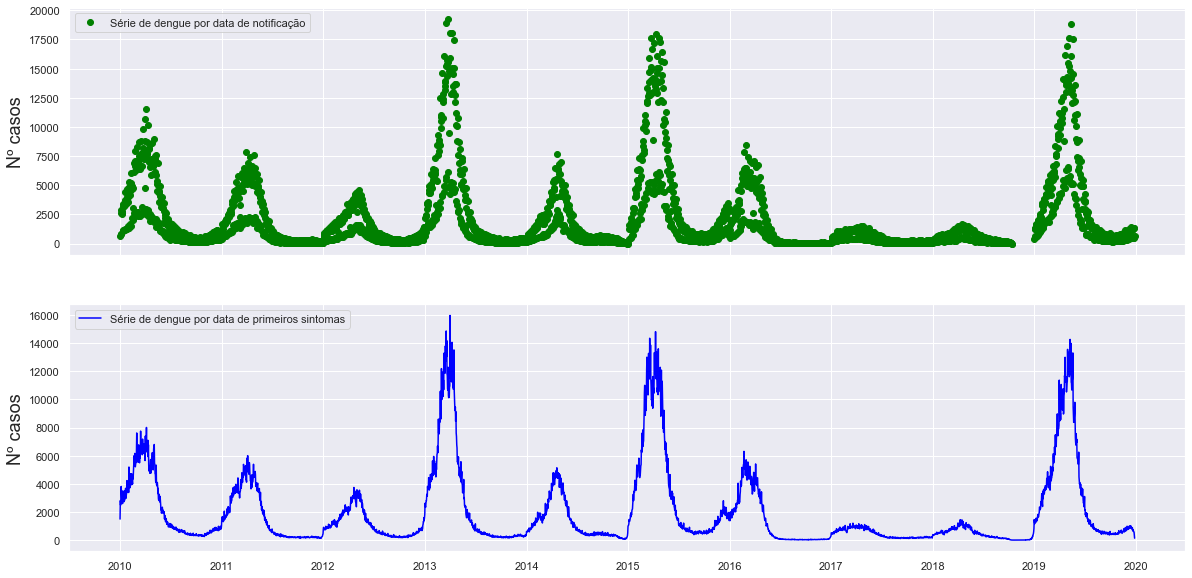

In [53]:
fig, [ax1,ax2] = plt.subplots(nrows=2, figsize=(20,10), sharex=True, sharey=False)

plt.subplots_adjust(wspace=1.5)


ax1.plot(dados2.dt_notific,dados2['count'], 'o', label='Série de dengue por data de notificação',color='green')
ax1.set_ylabel('Nº casos',fontsize=18)
ax1.legend(loc="upper left")

ax2.plot(dados.dt_sin_pri,dados['count'], label='Série de dengue por data de primeiros sintomas',color='blue')
ax2.set_ylabel('Nº casos',fontsize=18)
ax2.legend(loc="upper left")

         
#plt.savefig('arbo_series.png')
    

In [54]:
df.columns

Index(['classi_fin', 'criterio', 'cs_escol_n', 'cs_gestant', 'cs_raca',
       'cs_sexo', 'date', 'dt_nasc', 'dt_notific', 'dt_sin_pri', 'id_agravo',
       'id_mn_resi', 'id_municip', 'nu_ano', 'nu_idade_n', 'nu_notific',
       'sem_not', 'sem_pri', 'sg_uf', 'sg_uf_not', 'tp_not', 'nu_idade_n_cor',
       'faixa', 'count'],
      dtype='object')

## Clean and standardize gender variable 

In [55]:
df.cs_sexo.value_counts()

F    3900749
M    3088362
I       8246
Name: cs_sexo, dtype: int64

In [56]:
df.cs_sexo = df.cs_sexo.replace('F', 1)
df.cs_sexo= df.cs_sexo.replace('M', 2)

## Rename variables

In [57]:
df= df.rename(columns={"id_mn_resi": "codmunres"})

df= df.rename(columns={"nu_ano": "year"})

## Save data to be specific formated for modelling purposes

In [60]:
df.columns

Index(['classi_fin', 'criterio', 'cs_escol_n', 'cs_gestant', 'cs_raca',
       'cs_sexo', 'date', 'dt_nasc', 'dt_notific', 'dt_sin_pri', 'id_agravo',
       'codmunres', 'id_municip', 'year', 'nu_idade_n', 'nu_notific',
       'sem_not', 'sem_pri', 'sg_uf', 'sg_uf_not', 'tp_not', 'nu_idade_n_cor',
       'faixa', 'count'],
      dtype='object')

In [61]:
df.to_csv('/Users/julianeoliveira/Desktop/Modelling TaskForce Arboviruses/Data/dengue_conf_clean.csv')

# Population dataset

In [3]:
pop = pd.read_csv('/Users/julianeoliveira/Desktop/hard_disc/Datalake/POPULACAO/csv/POPBR12.csv')

In [4]:
pop.columns

Index(['MUNIC_RES', 'ANO', 'SEXO', 'SITUACAO', 'FXETARIA', 'POPULACAO'], dtype='object')

In [5]:
pop.FXETARIA.unique()

array([   0,  101,  202,  303,  404,  505,  606,  707,  808,  909, 1010,
       1111, 1212, 1313, 1414, 1515, 1616, 1717, 1818, 1919, 2024, 2529,
       3034, 3539, 4044, 4549, 5054, 5559, 6064, 6569, 7074, 7579, 8099])

In [6]:
pop = pop.replace({'FXETARIA': {0: 4, 101:4, 202:4,  303:4,  404:4,
                                505: 509, 606: 509,  707: 509,  808: 509,  909: 509,
                                1010: 1014, 1111: 1014, 1212: 1014, 1313: 1014, 1414: 1014,
                                1515: 1519, 1616: 1519, 1717: 1519, 1818: 1519, 1919: 1519}})

In [7]:
pop.head()

,MUNIC_RES,ANO,SEXO,SITUACAO,FXETARIA,POPULACAO
0,110001,2012,1,3,4,187
1,110001,2012,1,3,4,186
2,110001,2012,1,3,4,187
3,110001,2012,1,3,4,190
4,110001,2012,1,3,4,193


In [8]:
pop.to_csv('/Users/julianeoliveira/Desktop/Modelling TaskForce Arboviruses/Data/pop.csv')

# References and links

* https://github.com/kmahelona/ipython_notebook_goodies.git